# <b>Videogames Analysis</b>

In our online store Ice, we sell video games worldwide. 

We have access to data going back to 2016 on user and expert reviews, genres, platforms (such as Xbox or PlayStation), and historical game sales, all available from open sources. Now, in December 2016, we are planning a campaign for the next year, 2017.

In this study, our goal is to analyze various factors influencing the success of video games. By identifying patterns in these factors, we aim to predict which games are likely to perform well in the market. 

This analysis will help us make informed decisions about which projects to invest in and how to plan our advertising campaigns effectively. Through rigorous examination of the data, we aim to gain insights into the dynamics of the gaming industry and enhance our strategies for promoting and selling video games on Ice.

Let's kick things off by importing libraries which we might use during this study:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

Next, we load the dataset and store it in a variable, ensuring that all column names are converted to lowercase for consistency. 

We'll print a sample of the dataframe and its info to inspect what's in it. In the next section on data preparation, I'll be providing observations alongside the necessary corrections.

In [2]:
url = "https://raw.githubusercontent.com/leobabel/ProyectoIntegrado1/main/games.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.lower()
print(df.head())
print()
print(df.info())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11

## <b>Data Prep</b>

In this section, we delve into the crucial process of data preparation, which involves several steps aimed at ensuring the dataset is clean, organized, and ready for analysis.

Here, we address any inconsistencies or errors in the data by performing tasks such as handling missing values, correcting data types, and removing (or not) duplicates. This ensures the accuracy and reliability of our analysis.

Throughout this process, we'll be documenting our observations and any changes made to the dataset, ensuring transparency and reproducibility in our analysis.

Ultimately, the goal of data preparation is to transform the raw dataset into a clean, structured format that facilitates meaningful analysis and insights.

Let's begin by checking out the null values.

### Presence of Null Values


The dataframe under analysis contains several columns with null values, indicating missing data in various fields. Here is a summary of the observations:

In [3]:
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


The presence of these null values suggests gaps in the dataset that could affect the completeness and accuracy of our analysis. 

In particular, the large number of missing values in the 'critic_score', 'user_score', and 'rating' columns may require us to consider strategies for handling these gaps and ensuring robust and reliable results, specially when critic score null values account for 51% of the field's total entries, and user score null values account for 40% of the field's total entries.
 
Let's begin by handilg the 'critic_score' and 'user_score' null values.

### Handling Missing Data in Critic and User Scores for Video Game Analysis

Now, the question arises: What should we do with these NaN values?

<b>We are going to leave them as they are.</b>

Here’s why:

- Data Integrity: Imputing missing values, especially in large quantities, can introduce biases and distort the true nature of the data. By leaving the NaN values as they are, we maintain the integrity and authenticity of the dataset.

- Statistical Validity: With a significant portion of the data missing (51% for 'critic_score', 40% for 'user_score'), any imputation method would rely heavily on assumptions that may not hold true across the dataset. This could lead to inaccurate predictions and flawed analysis.

- Keeping NaN values allows for a more flexible and transparent analysis.

- By concentrating on the available data, we can still derive meaningful insights and trends. The remaining non-missing data is substantial enough to perform robust analyses and draw valuable conclusions.

- Clearly acknowledging the presence of missing data and its extent provides transparency. It helps in understanding the limitations of the dataset and ensures that any conclusions drawn are made with full awareness of the data’s completeness.

_We actually tried another iteration where we made use of a <b>Linear Regression</b> model which filled missing values with predictions aobut these scores. After all, researchers and analysts can apply different imputation methods tailored to specific analyses or use techniques that can handle missing data, such as certain machine learning algorithms that are robust to NaNs._

However, our model proved to be not that accurate. So we opted for leaving NaN values as we found them.

In conclusion, leaving the NaN values in 'critic_score' and 'user_score' columns maintains the dataset's integrity, avoids the introduction of biases, and allows for more flexible and accurate future analyses."

### The "user_score" Column

The 'user_score' column aggregates information from online platforms like Metacritic, IGN, Steam, gaming forums, and social media, where users rate and review video games on a scale of 10/10. 

Initially, this column contains 6701 NaN values and 2424 entries marked as <b>'tbd'</b> ('to be determined').

The presence of "tbd" values could be attributed to various factors; they may indicate that the rating for a particular game is pending determination or verification. It might also serve as a placeholder for missing values during data entry or processing. Or maybe some rating platforms use 'tbd' to denote unavailable or pending ratings.

Also, upon inspection, it was found that the data type for this column is currently an object.

In [4]:
print(f"NaN values in user_score: {df['user_score'].isna().sum()}")
print(f"'tbd' values in user_score: {(df['user_score'] == 'tbd').sum()}")
print(f"Type of data in user_score: {(df['user_score'].dtype)}")

NaN values in user_score: 6701
'tbd' values in user_score: 2424
Type of data in user_score: object


So we need to convert it to Float64 to enable calculations. However, this conversion is not possible with string values such as 'tbd'.

In light of these considerations, our plan of action for this column is twofold:

- First, we will convert 'tbd' values to NaN, as they essentially represent missing data for the purposes of our analysis.

- Second, we will convert the 'user_score' column from object to float64.

In [5]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')

# Verify the changes
print(f"NaN values in user_score AFTER conversions: {df['user_score'].isna().sum()}")
print(f"'tbd' values in user_score AFTER conversions: {(df['user_score'] == 'tbd').sum()}")
print(f"Type of data in user_score AFTER conversions: {(df['user_score'].dtype)}")

NaN values in user_score AFTER conversions: 9125
'tbd' values in user_score AFTER conversions: 0
Type of data in user_score AFTER conversions: float64


### Deletion of 'name', 'genre' and 'year_of_release' null values

In the 'year_of_release' column, we have the presence of 269 null values.

Let's visualize the null values in the 'name' column. Interestingly, we notice that these two indexes (659 and 1422) also exhibit null values in the 'genre' column.

In [6]:
print(df[df['name'].isnull()])
print('_'*75)
print(df[df['genre'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  
___________________________________________________________________________
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


There are several plausible explanations for the presence of NaN (Not a Number) values in the 'year_of_release', 'name', and 'genre' columns:

- Errors during data entry or oversight during data collection could have resulted in incomplete or missing information.

- If the dataset amalgamated data from various sources, disparities or missing data in these sources might have contributed to NaN values.

- Information regarding release years might have been absent from the dataset due to data collection oversights or unavailability.

- For certain games, especially older or less prominent ones, precise release year information might not be readily accessible or well-documented.

- Errors or corruption during data processing, storage, or transfer could have introduced NaN values.

Given these considerations, we opt to remove these entries, which constitute a mere 1.63% of the total records. Consequently, their exclusion will have minimal impact on the overall analysis.

In [7]:
# Alright, go away, mf'ers
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

### Date format change

Let's change 'year_of_release' data type from float64 to something more useful.

In [8]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce').dt.year
print(f"Type of data in year_of_release AFTER conversion: {(df['year_of_release'].dtype)}")


Type of data in year_of_release AFTER conversion: int32


### The 'rating' column

The dataframe includes a "rating" column that stores the ESRB rating of each game. The <b>Entertainment Software Rating Board</b> evaluates the content of a game and assigns an age rating which goes from 'E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', and 'RP'.

Here's what each rating means:

- <b>E (Everyone):</b> Suitable for all ages. Content is generally suitable for all ages. May contain minimal cartoon, fantasy, or mild violence and/or infrequent use of mild language.

- <b>EC (Early Childhood):</b> Suitable for young children. Content is intended for young children and contains no material that parents would find inappropriate.

- <b>E10+ (Everyone 10 and older):</b> Suitable for ages 10 and older. Content is generally suitable for ages 10 and up. May contain more cartoon, fantasy, or mild violence, mild language, and/or minimal suggestive themes.

- <b>K-A (Kids to Adults):</b> An early rating used by the ESRB before 1998, which was replaced by the "E" rating. Suitable for ages 6 and older.

- <b>T (Teen):</b> Suitable for ages 13 and older. Content may include violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.

- <b>M (Mature):</b> Suitable for ages 17 and older. May contain intense violence, blood and gore, sexual content, and/or strong language.

- <b>AO (Adults Only):</b> Suitable only for adults ages 18 and older. May include prolonged scenes of intense violence, graphic sexual content, and/or gambling with real currency.

- <b>RP (Rating Pending):</b> This is a placeholder used for games that have been submitted to the ESRB and are awaiting a final rating.

These ratings help consumers, especially parents, make informed choices about the video games they purchase.

<b>The field also presents 6766 NaN values.</b>

The presence of these NaN values could stem from several reasons:

- Missing Data Entry: Oversight or human error during data collection or entry processes might have led to the absence of rating information for certain entries.

- Unavailable Ratings: Particularly for older or niche games, official ratings may not have been provided by relevant rating authorities such as ESRB or PEGI, resulting in missing values.

- Incomplete Dataset: Data sourcing from multiple origins or an incomplete dataset might contribute to information gaps for specific entries.

- Data Privacy or Confidentiality: In some instances, rating details could have been intentionally excluded to adhere to data privacy regulations or safeguard sensitive information.

Given these considerations, it's crucial to understand the dataframe context and the nature of missing values before deciding on the best course of action.

Proposed Approach:

Replacing NaN values with "Undefined" in the 'rating' column offers a pragmatic solution. This preserves data integrity while clearly indicating that a rating was not provided for those entries. This approach aids subsequent analysis or visualization tasks by distinguishing between missing and explicitly unspecified values, which can be pivotal in drawing accurate insights from the dataset.

In [9]:
df['rating'] = df['rating'].fillna('Undefined')
print(df['rating'].sample(10))

502              T
4739             E
10358            E
14231            T
5257             M
14359    Undefined
7446             T
9604             E
16531    Undefined
9539          E10+
Name: rating, dtype: object


To gain familiarity with the dataset and understand the distribution of ratings, let's examine the unique values present in the 'rating' column and calculate their percentages relative to the total number of entries. This will provide insights into the diversity of ratings assigned to the titles in our dataset.

In [10]:
# We start by getting the unique values in the 'rating' column
unique_ratings = df['rating'].unique()

# Then we get the total number of records in the DataFrame
total_records = len(df)

# Then, we create a bucle for iterating over each unique rating
for rating in unique_ratings:
    rating_count = df[df['rating'] == rating].shape[0]
    percentage = (rating_count / total_records) * 100
    print(f"Rating: {rating} | Entries: {rating_count} | Percentage: {percentage:.2f}%")


Rating: E | Entries: 3921 | Percentage: 23.84%
Rating: Undefined | Entries: 6676 | Percentage: 40.60%
Rating: M | Entries: 1536 | Percentage: 9.34%
Rating: T | Entries: 2905 | Percentage: 17.67%
Rating: E10+ | Entries: 1393 | Percentage: 8.47%
Rating: K-A | Entries: 3 | Percentage: 0.02%
Rating: AO | Entries: 1 | Percentage: 0.01%
Rating: EC | Entries: 8 | Percentage: 0.05%
Rating: RP | Entries: 1 | Percentage: 0.01%


### Null values final result

So, this is the result of our handling of missing values:

In [11]:
nan_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of NaN values for each column:")
print(nan_percentage)


Percentage of NaN values for each column:
name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating              0.000000
dtype: float64


### Total Sales

To provide a comprehensive view of each game's total sales across all regions, we are going to calculate the total sales by summing the sales figures from the 'na_sales' (North America), 'eu_sales' (Europe), 'jp_sales' (Japan), and 'other_sales' (other regions) columns, then place these sums in a new 'total_sales' column immediately after the 'other_sales' column for better readability and organization.

This step ensures that we have a single column reflecting the combined sales data, which simplifies the analysis and helps in understanding the overall performance of each game across all regions.

In [12]:
# We beggin by summing sales from 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Then we insert the new column 'total_sales' after 'other_sales'
other_sales_index = df.columns.get_loc('other_sales')
df.insert(other_sales_index + 1, 'total_sales', df.pop('total_sales'))

print(df.sample(5))


                                                    name platform  \
6363                                         Punch-Out!!      Wii   
4166                                      Bomberman Hero      N64   
13556  Chou Gekijoban Keroro Gunsou: Gekishin Dragon ...       DS   
16349        Military History: Commander - Europe at War       DS   
2441                                Ninja Gaiden Sigma 2      PS3   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
6363              2007    Sports      0.00      0.22      0.05         0.00   
4166              1998  Platform      0.27      0.06      0.08         0.05   
13556             2009    Action      0.00      0.00      0.04         0.00   
16349             2009  Strategy      0.00      0.01      0.00         0.00   
2441              2009    Action      0.52      0.16      0.08         0.10   

       total_sales  critic_score  user_score     rating  
6363          0.27           NaN         NaN  Undefi

### The Duplicates case

In our dataframe, we've identified a substantial number of duplicates in the 'name' column, totaling 5018 instances. These duplicates arise due to various factors inherent to the gaming industry and dataset compilation processes.

Firstly, duplicates often occur when a single game title is released across multiple platforms. 

For instance, "Super Mario Bros." appears twice, once for the NES platform and again for the DS platform. 

Similarly, "Grand Theft Auto V" is present across PS3, X360, and PS4 platforms. These duplicates reflect the widespread practice of developers releasing games for different gaming consoles or platforms to reach a broader audience.

Furthermore, re-releases and remastered editions contribute to the presence of duplicates. Games may undergo re-releases on newer platforms or receive updated versions with enhanced features or graphics, resulting in multiple entries for the same title.

Despite the prevalence of duplicates, we've chosen to leave them untouched for several reasons. Firstly, these duplicates provide valuable insights into the popularity and longevity of certain game titles across different platforms over time. Analyzing the sales, ratings, and user reception of these duplicates can offer a comprehensive understanding of their impact on the gaming market.

Moreover, removing duplicates indiscriminately could lead to the loss of crucial information and skew our analysis results. Each entry for a duplicate title may contain unique sales figures, user ratings, or critic scores, all of which contribute to our understanding of the game's performance and reception.

Therefore, by retaining these duplicates and treating them as distinct entries, we ensure that our analysis remains comprehensive and reflective of the diverse landscape of the gaming industry.

In [13]:
duplicate_count = df.duplicated(subset=['name']).sum()
print("Number of duplicates in the 'name' column:", duplicate_count)

duplicate_samples = df[df.duplicated(subset=['name'], keep=False)]
print("\nSample of duplicate entries in the 'name' column:")
print(duplicate_samples.head(60))

Number of duplicates in the 'name' column: 5018

Sample of duplicate entries in the 'name' column:
                                       name platform  year_of_release  \
1                         Super Mario Bros.      NES             1985   
5                                    Tetris       GB             1989   
16                       Grand Theft Auto V      PS3             2013   
17            Grand Theft Auto: San Andreas      PS2             2004   
18                        Super Mario World     SNES             1990   
22                      Super Mario Bros. 3      NES             1988   
23                       Grand Theft Auto V     X360             2013   
24              Grand Theft Auto: Vice City      PS2             2002   
29           Call of Duty: Modern Warfare 3     X360             2011   
31                Call of Duty: Black Ops 3      PS4             2015   
32                  Call of Duty: Black Ops     X360             2010   
34               Call of 

### Miscellaneous data prep
Let's perform some extra calculations to better understand the data contained in this dataframe. These steps will help us gain deeper insights and ensure the data is well-prepared for analysis.

First, we will examine the number of different platforms represented in this dataframe. This step will give us an understanding of the diversity and range of platforms included in the dataset, which is crucial for comprehensive analysis.

In [14]:
# Get unique values in the 'platform' column
unique_platforms = df['platform'].unique()
for platform in unique_platforms:
    print(platform)
print()
# Count the number of unique platforms
num_unique_platforms = df['platform'].nunique()
print(f"Number of platforms: {num_unique_platforms}")


Wii
NES
GB
DS
X360
PS3
PS2
SNES
GBA
PS4
3DS
N64
PS
XB
PC
2600
PSP
XOne
WiiU
GC
GEN
DC
PSV
SAT
SCD
WS
NG
TG16
3DO
GG
PCFX

Number of platforms: 31


Next, we will identify the number of unique genres in the dataframe and list all the genres included. This analysis will provide insight into the variety of game genres represented, which is essential for understanding the breadth of the dataset.

In [15]:
unique_genres = df['genre'].unique()

# First, we create a dictionary to store the counts of each genre
genre_counts = {}

# Count the total number of records
total_records = len(df)

# Bucle-for for iterating over each unique genre and count the number of records
for genre in unique_genres:
    genre_count = df[df['genre'] == genre].shape[0]
    genre_counts[genre] = genre_count

# We sort genres by count in descending order, cuz' we hate having them disordered
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Print genres, their counts, and percentages in descending order
for genre, count in sorted_genres:
    percentage = (count / total_records) * 100
    print(f"Genre: {genre} | Entries: {count} | Percentage: {percentage:.2f}%")

# Count the number of unique genres
num_unique_genres = df['genre'].nunique()
print(f"\nNumber of genres: {num_unique_genres}")

Genre: Action | Entries: 3307 | Percentage: 20.11%
Genre: Sports | Entries: 2306 | Percentage: 14.02%
Genre: Misc | Entries: 1721 | Percentage: 10.47%
Genre: Role-Playing | Entries: 1481 | Percentage: 9.01%
Genre: Shooter | Entries: 1296 | Percentage: 7.88%
Genre: Adventure | Entries: 1293 | Percentage: 7.86%
Genre: Racing | Entries: 1226 | Percentage: 7.46%
Genre: Platform | Entries: 878 | Percentage: 5.34%
Genre: Simulation | Entries: 857 | Percentage: 5.21%
Genre: Fighting | Entries: 837 | Percentage: 5.09%
Genre: Strategy | Entries: 673 | Percentage: 4.09%
Genre: Puzzle | Entries: 569 | Percentage: 3.46%

Number of genres: 12


Finally, let's rectify an error in the data pertaining to a specific game called "Strongest Tokyo University Shogi DS" and its year of release. The current record indicates a release year of 1985, which is inaccurate. The game was actually released in 2010.

In [16]:
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2010
print(df[df['name'] == 'Strongest Tokyo University Shogi DS'])

                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             2010  Action   

       na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
15957       0.0       0.0      0.02          0.0         0.02           NaN   

       user_score     rating  
15957         NaN  Undefined  


### Preliminary Observations

The dataset encompasses a significant timeframe from 1980 to 2016, offering insights into 31 distinct gaming platforms and 12 diverse genres. Notably, Action games dominate the dataset, representing 20.11% of entries, followed closely by Sports games at 14.02%.

It's important to note there is a substantial presence of missing values in critical areas, including critic score (51.45%), user score (54.62%). We've opted to leave them alone, as we surmise its present missing values won't affect our analysis.

Additionally, the Wii platform emerges as the most prevalent, while "Wii Sports" (Wii, 2006, Sports) achieves remarkable success, boasting the highest total sales of 82.54 million units. Truly remarkable findings.

In [17]:
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
sales_statistics = df[sales_columns].describe()
print(sales_statistics)


           na_sales      eu_sales      jp_sales   other_sales   total_sales
count  16444.000000  16444.000000  16444.000000  16444.000000  16444.000000
mean       0.264012      0.145930      0.078487      0.047594      0.536023
std        0.818378      0.506716      0.311100      0.188005      1.558786
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.030000      0.470000
max       41.360000     28.960000     10.220000     10.570000     82.540000


Moreover, delving into sales data reveals intriguing patterns. The dataset's sales figures, including North America (NA), Europe (EU), Japan (JP), and other regions, showcase a comprehensive view of the gaming market. Notably, the mean total sales stand at 0.536 million units, with considerable variations indicated by the standard deviations.

Across regions, North America boasts the highest mean sales at 0.264 million units, followed by Europe at 0.146 million units and Japan at 0.078 million units. Other regions contribute modestly, with a mean of 0.048 million units.

Examining quartiles, 75% of games have total sales below 0.47 million units, while the maximum recorded total sales reach an impressive 82.54 million units, showcasing remarkable outliers in the market.

### Final Dataframe

Alright, here's the model we'll use for our analysis:

In [18]:
print(df.sample(50))
print('-'*50)
print(df.info())

                                                    name platform  \
5858                                         Famista '91      NES   
11878                             Spot Goes to Hollywood       PS   
7982                      Samurai Warriors: State of War      PSP   
3181                                         NBA Live 08      PS3   
7953              Earth Defense Force: Insect Armageddon     X360   
8495                                             F1 2011      3DS   
5821                                         NBA Live 08      PSP   
3453                               Shin Megami Tensei IV      3DS   
10224                      Top Angler: Real Bass Fishing      PS2   
15166                                         QUIZ PARTY      Wii   
16370  Sengoku Hime 2 Arashi: Hyakubana Senran Tatsuk...      PSP   
13793                                     Ookami Kakushi      PSP   
6724                  Ed, Edd n Eddy: The Mis-Edventures       GC   
5337                   Charlie and

## <b>Analysis All Years</b>

In this section, we'll explore the distribution of data through descriptive statistics and visualizations takin into account the whole span of years, begining from 1980. This step helps us gain insights into the dataset's characteristics of values across different variables.

### Number of games released per year

By examining games released by year, we can gain insights into the gaming industry's evolution and identify any noteworthy shifts or consistent trends in game production.

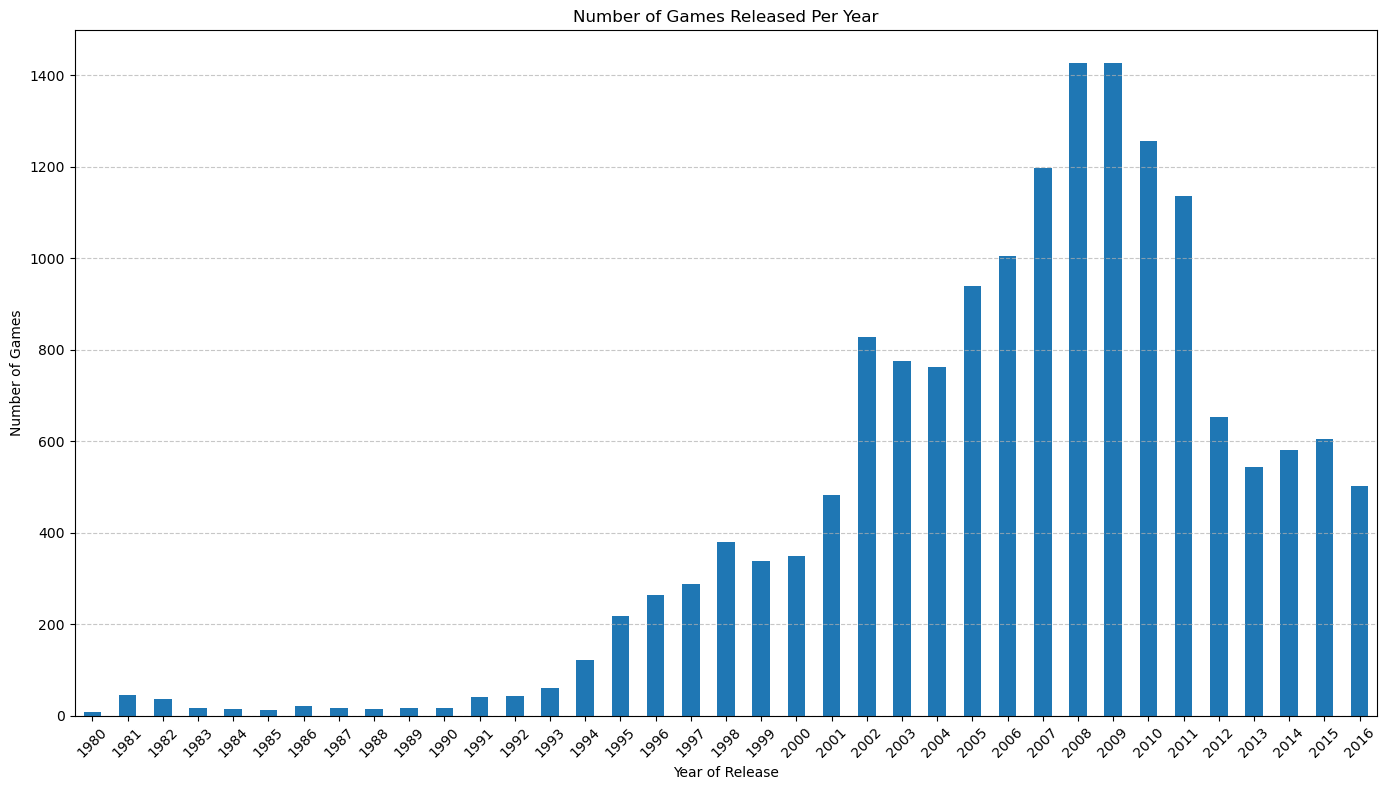

In [19]:
plt.figure(figsize=(14, 8))
df['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The data on the number of games released per year reveals significant trends and shifts within the video game industry: 

- In the early years (1980-1990), the industry was in its infancy, with a relatively low number of game releases. This period saw steady but modest growth, reflecting the nascent stages of gaming technology and market development. 

- Moving into the 1990s and early 2000s, there was a noticeable increase in game releases, corresponding with the rise of advanced gaming consoles and the expansion of the gaming market.

- The peak period from 2001 to 2010 highlights a substantial boom in game releases, particularly around 2008 and 2009. This era, dominated by consoles like the PlayStation 2, Xbox 360, and Nintendo Wii, saw extensive game libraries and significant market growth. 

- In recent years (2011-2016), there has been a slight decline in the number of releases, which could be attributed to market saturation, the rise of mobile gaming, and industry shifts towards digital distribution and indie games. 

Overall, the data for each period is significant as it reflects the evolution of the video game industry, providing valuable insights into market dynamics, technological advancements, and consumer preferences.

### Number of games released per platform

Here we've got insights into the variation in the number of games released across different gaming platforms over the years. 

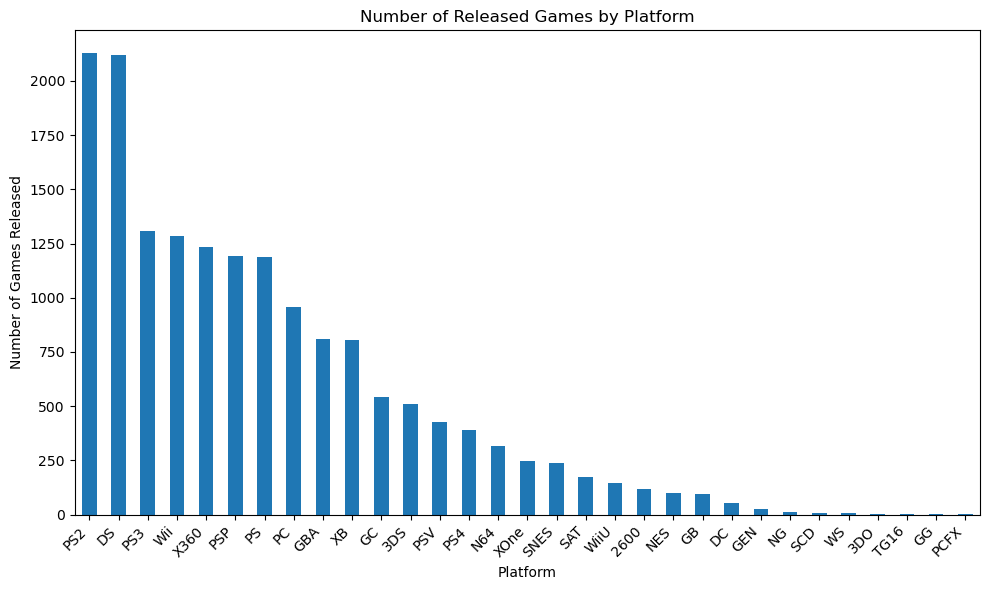

In [20]:
platform_counts = df['platform'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar')
plt.title('Number of Released Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The top platforms in terms of game releases include PS2, DS, PS3, Wii, X360, PSP and PS, with each platform seeing thousands of games released. The sales shown from the rest of the platforms could be explained by their lifespan, which we will analyze in a brief moment.

### Number of games released for each genre

Here it's revealed the distribution of game releases by genre:

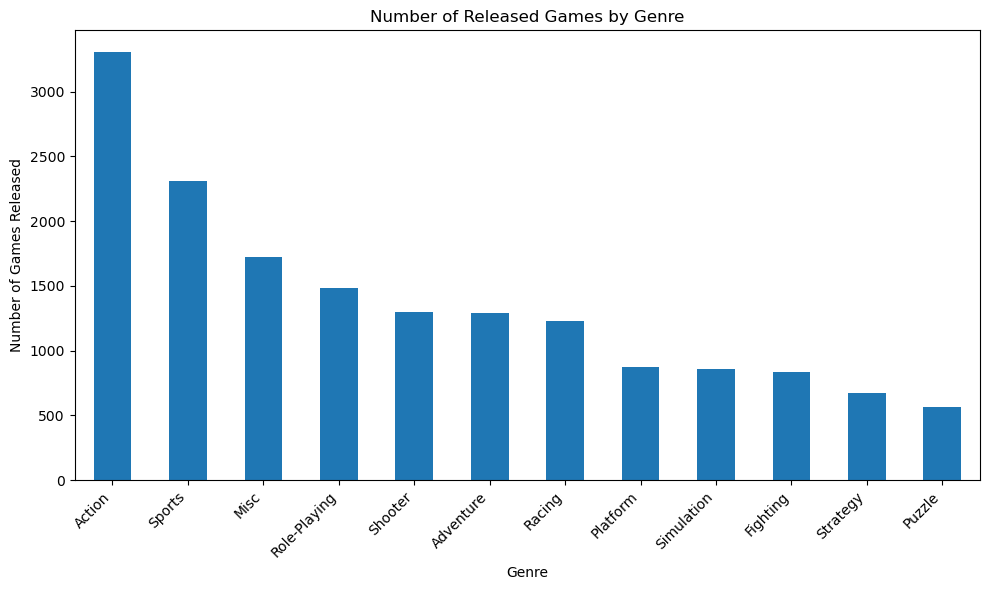

In [21]:
genre_counts = df['genre'].value_counts().sort_values(ascending=False)

# Graphic starts here
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Released Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The graph showcases Action as the dominant genre with 3307 games, followed by Sports with 2306 games. 

We will study this with more detail in a brief moment, but it's worth to say that among other prominent genres include Misc (1721), Role-Playing (1481), and Shooter (1296). 

Adventure, Racing, Platform, Simulation, and Fighting genres also contribute significantly to the total count of game releases, reflecting the diverse offerings within the gaming industry.

Curiously enough, the vast majority of Strategy and Puzzle games were relased in Japan, which says a lot about this country's preferences.

### Number of games for each rating

This breakdown illustrates the distribution of games by rating. Since we replaced NaN values with an "Undefined" rating, this label comprised the majority of the counts, comprising 6676 titles. 

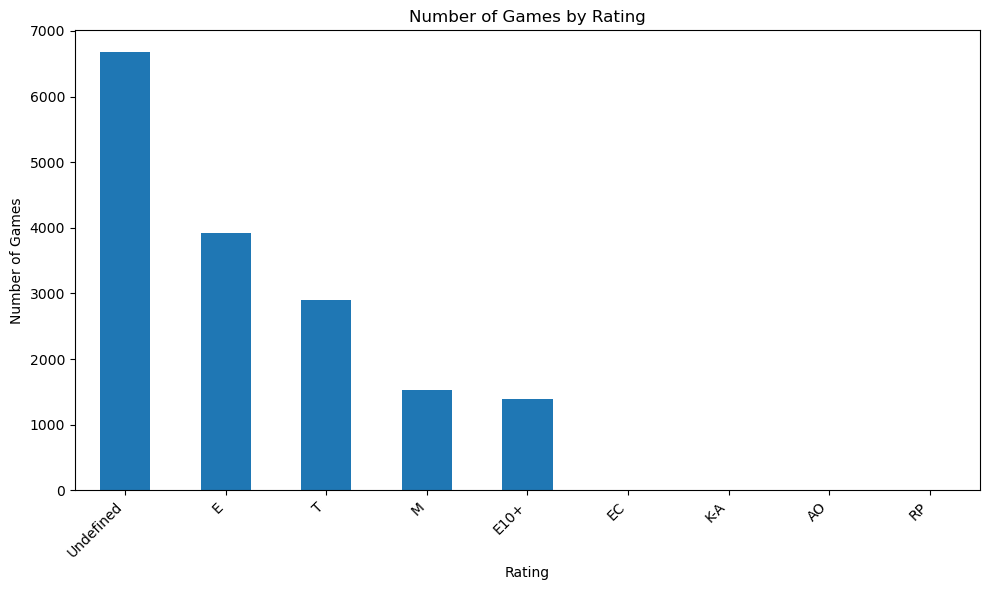

In [22]:
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

# Graphic starts here
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Number of Games by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



However, we're interested in the ratings which follows; the ratings include E (3921), T (2905), M (1536), and E10+ (1393). Naturally, developers are mostly interested in making games for broad niches (E) and the Teenager niche (T).

There are also a few games with less common ratings such as EC, K-A, AO, and RP, although they are relatively rare compared to the others.

If we compare the number of games released by rating and its sales, we'll have an interesting finding:

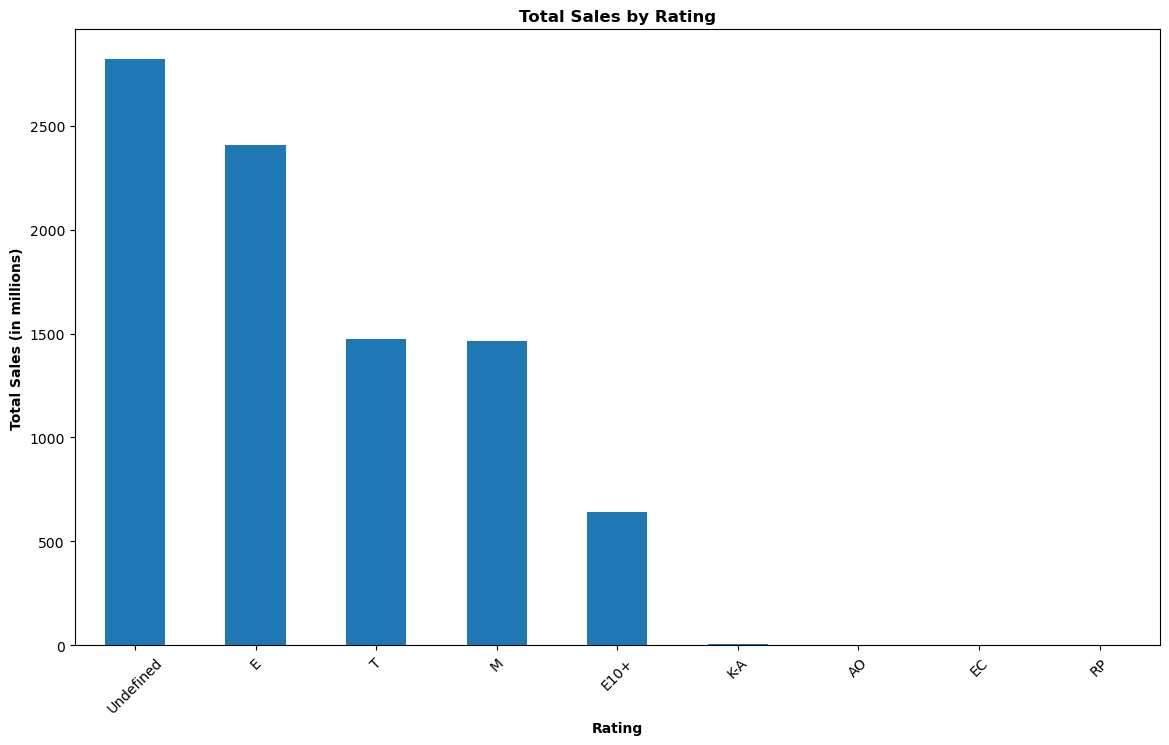

In [23]:
sales_by_rating = df.groupby('rating')['total_sales'].sum().sort_values(ascending=False)

# Graphic starts here
plt.figure(figsize=(14, 8))
sales_by_rating.plot(kind='bar')

plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Total Sales (in millions)', fontweight='bold')
plt.title('Total Sales by Rating', fontweight='bold')
plt.xticks(rotation=45)

plt.show()


Here we can see that although there were less M (Mature) games released than T (Teen), they sold almost the same, which says a lot regarding the preference for this type of games. 

## <b>Platform Lifespans</b>

The average lifespan of new platforms introduced since 2016 is approximately 9.11 years, while older platforms released before 2016 have an average lifespan of around 6.14 years. This suggests a trend towards longer lifespans for newer platforms, potentially indicating sustained support from developers and publishers.

In [24]:
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# Average lifespan of new and old platforms
average_new_platform_lifespan = platform_lifespan[platform_lifespan['max'] >= 2016]['lifespan'].mean()
average_old_platform_lifespan = platform_lifespan[platform_lifespan['max'] < 2016]['lifespan'].mean()

print("Average lifespan of new platforms (released in or after 2016):", average_new_platform_lifespan)
print("Average lifespan of old platforms (released before 2016):", average_old_platform_lifespan)

Average lifespan of new platforms (released in or after 2016): 9.11111111111111
Average lifespan of old platforms (released before 2016): 6.136363636363637


### Total Sales of Platforms Over the Years

Now, let's make a line plot which compares the total sales of top gaming platforms over the years, where each line represents a different gaming platform, with sales figures plotted annually. 

The shaded areas around the lines likely represent the variability or confidence intervals of the sales data.

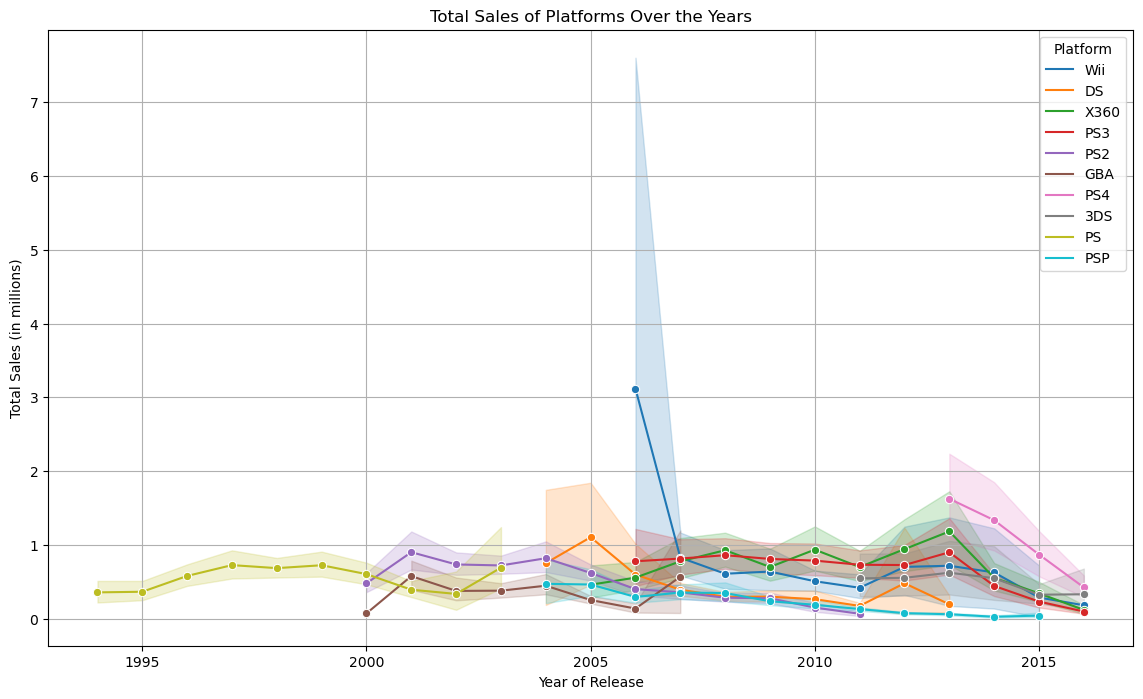

In [25]:
# Let's begin by calculating total sales for each platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Then, we select the top platforms with the highest total sales
top_platforms = platform_sales.head(10).index

# Then, Fwe filter the dataset for only the top platforms
top_platforms_data = df[df['platform'].isin(top_platforms)]

# Graphic starts here
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_platforms_data, x='year_of_release', y='total_sales', hue='platform', marker='o')

plt.title('Total Sales of Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

Let's delve in some observations:

- Wii (Blue Line): Notably, Wii saw a significant spike in sales around 2006-2008, peaking at around 8 million units. This indicates a period of high popularity, likely coinciding with its initial release and innovative motion controls.


- DS (Orange Line): The DS platform also saw considerable sales, peaking around 2006-2007 before gradually declining.


- PS2 (Brown Line): PS2 maintained relatively stable sales with a slight peak around 2002-2004, remaining one of the top platforms for an extended period.


- X360 (Green Line): Xbox 360 had a moderate peak around 2006-2008, aligning with the release of popular game titles and hardware updates.


- PS3 (Red Line) and PS4 (Pink Line): Both PlayStation platforms show steady sales over time, with PS3 peaking around 2007-2009 and 


- PS4 shows an increasing trend after 2013. highlighting the shift towards newer consoles.


- Other Platforms: Platforms like GBA, 3DS, PS, and PSP show relatively lower and more stable sales, without significant peaks.

After their respective peaks, most platforms show a decline in sales, indicating the natural lifecycle of gaming consoles as new generations are released.

The data reflects the evolving market preferences and the introduction of new technologies that influence consumer buying behavior. The spikes in sales for Wii and DS suggest periods where these consoles offered unique features that captured significant market interest.

The plot demonstrates the lifecycle of various gaming platforms, highlighting key periods of high sales. For a game to succeed, it should ideally be released on platforms with a rising trend or during the peak periods of popular consoles. Given the trends, platforms like PS4, which show recent increasing sales, might be strategic choices for new game releases. Understanding these trends helps developers and marketers align their strategies with the most promising platforms in the market.

### Lifecycle duration of each platform:

Now, let's compare the lifecycle duration of platforms, taking into account the fact that this dataset reaches 2016:

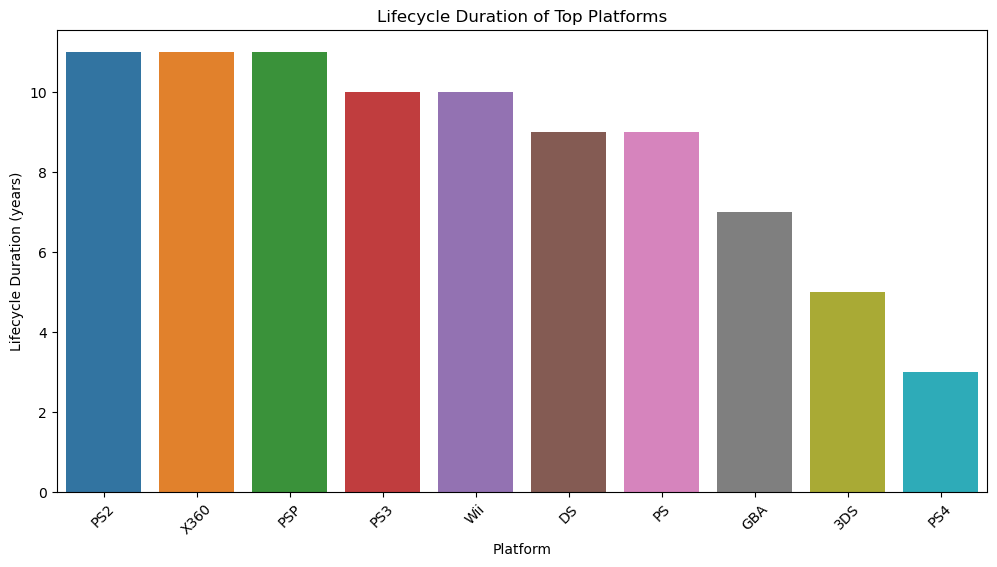

In [26]:
# Had to do this manually out of not knowing how to call the consoles I need for this analysis
lifecycle_duration = {
    'PS2': 11,
    'X360': 11,
    'PS3': 10,
    'Wii': 10,
    'DS': 9,
    'PS': 9,
    'PS4': 3,
    'GBA': 7,
    'PSP': 11,
    '3DS': 5
}

lifecycle_df = pd.DataFrame(list(lifecycle_duration.items()), columns=['Platform', 'Lifecycle Duration'])

lifecycle_df = lifecycle_df.sort_values(by='Lifecycle Duration', ascending=False)

# Graphic starts here
plt.figure(figsize=(12, 6))
sns.barplot(data=lifecycle_df, x='Platform', y='Lifecycle Duration')
plt.title('Lifecycle Duration of Top Platforms')
plt.xlabel('Platform')
plt.ylabel('Lifecycle Duration (years)')
plt.xticks(rotation=45)
plt.show()


Lifecycle duration (in years) for each platform:
- PS2: 11 years
- X360: 11 years
- PS3: 10 years
- Wii: 10 years
- DS: 9 years
- PS: 9 years
- PS4: 3 years
- GBA: 7 years
- PSP: 11 years
- 3DS: 5 years

Emergence and phase-out times for top platforms:
- X360: Emerged in 2005, Phased out in 2016
- PS3: Emerged in 2006, Phased out in 2016
- Wii: Emerged in 2006, Phased out in 2016
- DS: Emerged in 2004, Phased out in 2013
- PS2: Emerged in 2000, Phased out in 2011

Examining the lifecycle durations of various platforms reveals that PS2 and X360 had the longest lifespans, emerging as popular platforms in the early 2000s and phasing out in the subsequent years. 

Conversely, newer platforms like PS4 emerged more recently but faced relatively short lifespans in terms of game releases.

Overall, this analysis highlights the dynamic nature of the gaming industry, with shifts in platform popularity and lifecycle durations influencing the number of games released each year and shaping the gaming landscape.

## <b>Analysis 2005 - 2016</b>

Based on the prvious analysis, we are considering the years from 2005 to 2016 for our analysis and model-building for several key reasons:

- Platform Lifecycle Coverage: This period captures the complete lifecycle of significant gaming consoles such as the Xbox 360, which was launched in 2005, and the PlayStation 3, launched in 2006. By including these years, we can analyze how their introduction, peak sales periods, and eventual decline provides a comprehensive view of their market impact.


- Emerging Trends: Starting from 2005 allows us to observe the transition periods for major gaming platforms and the shift in the market towards newer consoles like the PlayStation 4 and Xbox One. This range includes the initial years of these newer consoles, which is crucial for understanding their market adoption and performance.


- Market Evolution: The years 2005 to 2016 encompass significant changes in the gaming industry, including shifts in consumer preferences, the rise of digital and mobile gaming, and the introduction of innovative gaming technologies. These factors are essential for understanding the broader market trends and consumer behavior.


- Technological Advances: This period includes major technological advancements and their adoption within the gaming industry. By analyzing this range, we can see how technological improvements influenced game sales and platform popularity.

By focusing on the years 2005 to 2016, we ensure that our dataset is rich in relevant information, providing a robust foundation for building an accurate and predictive model for 2017. This timeframe offers a balanced view of the gaming industry's evolution, capturing both the mature and emerging trends that are critical for informed decision-making.

From now on, we'll work on a new dataframe that filters this timespan:

In [27]:
df_recent = df[(df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2016)]



### Top 10 Games with Highest Total Sales

Now, let's take a look at the best sellers:

                         name  na_sales  eu_sales  jp_sales  other_sales  \
0                  Wii Sports     41.36     28.96      3.77         8.45   
2              Mario Kart Wii     15.68     12.76      3.79         3.29   
3           Wii Sports Resort     15.61     10.93      3.28         2.95   
6       New Super Mario Bros.     11.28      9.14      6.50         2.88   
7                    Wii Play     13.96      9.18      2.93         2.84   
8   New Super Mario Bros. Wii     14.44      6.94      4.70         2.24   
10                 Nintendogs      9.05     10.95      1.93         2.74   
11              Mario Kart DS      9.71      7.47      4.13         1.90   
13                    Wii Fit      8.92      8.03      3.60         2.15   
14         Kinect Adventures!     15.00      4.89      0.24         1.69   

    total_sales  
0         82.54  
2         35.52  
3         32.77  
6         29.80  
7         28.91  
8         28.32  
10        24.67  
11        23.21  
1

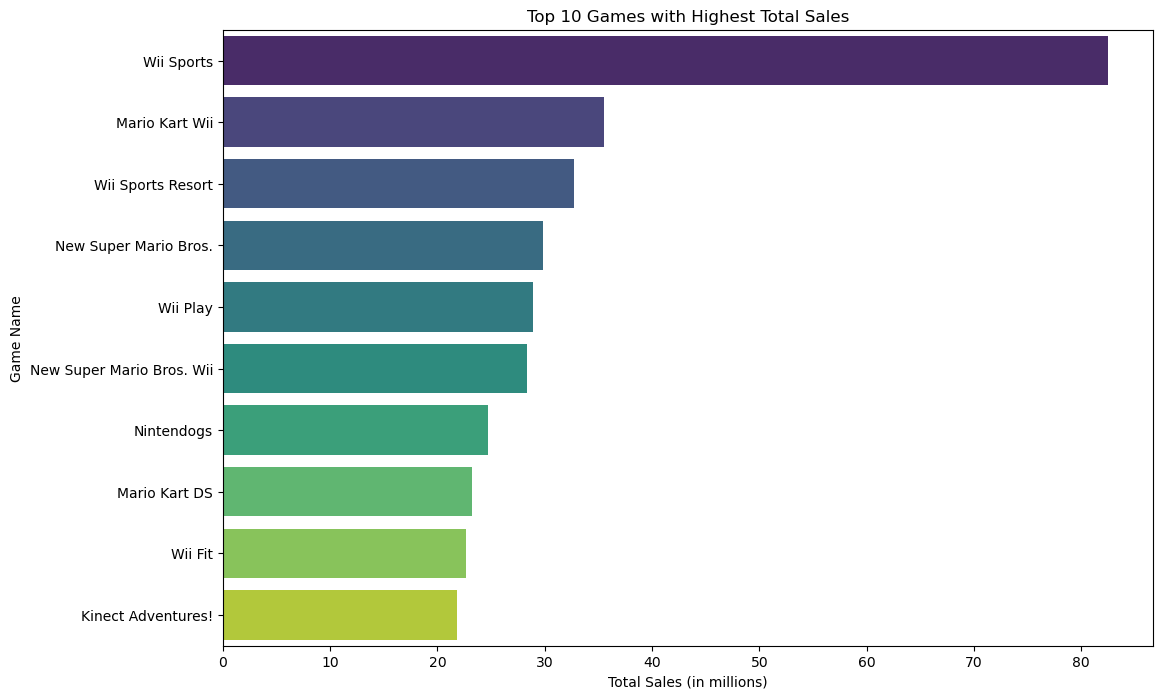

In [28]:
top_10_games = df_recent[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].copy()
top_10_games['total_sales'] = top_10_games['na_sales'] + top_10_games['eu_sales'] + top_10_games['jp_sales'] + top_10_games['other_sales']
top_10_games = top_10_games.sort_values(by='total_sales', ascending=False).head(10)
print(top_10_games)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_games, x='total_sales', y='name', palette='viridis')
plt.title('Top 10 Games with Highest Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Game Name')
plt.show()


This provides a fascinating glimpse into the gaming landscape, showcasing the top ten best-selling games of all time.

- At the helm sits <b>"Wii Sports"</b>, a title that amassed an impressive 82.54 million units sold worldwide, demonstrating the remarkable appeal of interactive sports experiences. 


- <b>Mario Kart Wii</b> and <b>Wii Sports Resort</b> hold prominent positions as well, with 35.52 million and 32.77 million units sold respectively. These titles emphasize the continued popularity of multiplayer and family-friendly games on the Wii platform.


- <b>New Super Mario Bros.</b> and <b>New Super Mario Bros. Wii</b> further exemplify the enduring popularity of Mario and his adventures. With combined sales of over 58 million units, these games highlight the strong appeal of traditional platformers with modern twists. These games not only highlight the enduring popularity of beloved characters like Mario and Luigi but also showcase the innovative gameplay and engaging multiplayer experiences that have become synonymous with Nintendo's platforms.


- <b>Wii Play</b> and <b>Nintendogs</b> showcase the broad range of successful game genres. Wii Play, with its collection of mini-games, and Nintendogs, a pet simulation game, both achieved significant sales, demonstrating the diverse interests of gamers during this period.


- <b>Mario Kart DS</b> and <b>Kinect Adventures!</b> illustrate the success of portable gaming and motion-controlled experiences, respectively. Mario Kart DS, with 23.21 million units sold, underscores the strength of the Mario Kart franchise on handheld consoles. Kinect Adventures!, with 21.82 million units, highlights the brief yet impactful popularity of motion-sensing gameplay on the Xbox 360. 

    
- However, the continued popularity of Mario and other iconic Nintendo characters suggests that leveraging well-known franchises can significantly boost sales. Developing new games within these beloved universes could ensure a strong market presence.


- <b>Wii Fit</b>, with 22.70 million units sold, underscores the successful incorporation of fitness into gaming. This game tapped into a niche market of fitness enthusiasts and casual gamers, blending entertainment with physical activity.


The consistent success of games like Wii Sports, Mario Kart, and Wii Sports Resort indicates a strong market for family-friendly and multiplayer games. Future developments should consider these elements to attract a broad audience.

The analysis of the updated sales data from 2005 to 2016 reaffirms the importance of family-friendly, multiplayer, and innovative gameplay experiences. By focusing on these elements and leveraging iconic franchises, game developers and marketers can continue to achieve significant success in the evolving gaming landscape.


### Top Platforms by Sales

We're going to inspect the most profitable platforms.

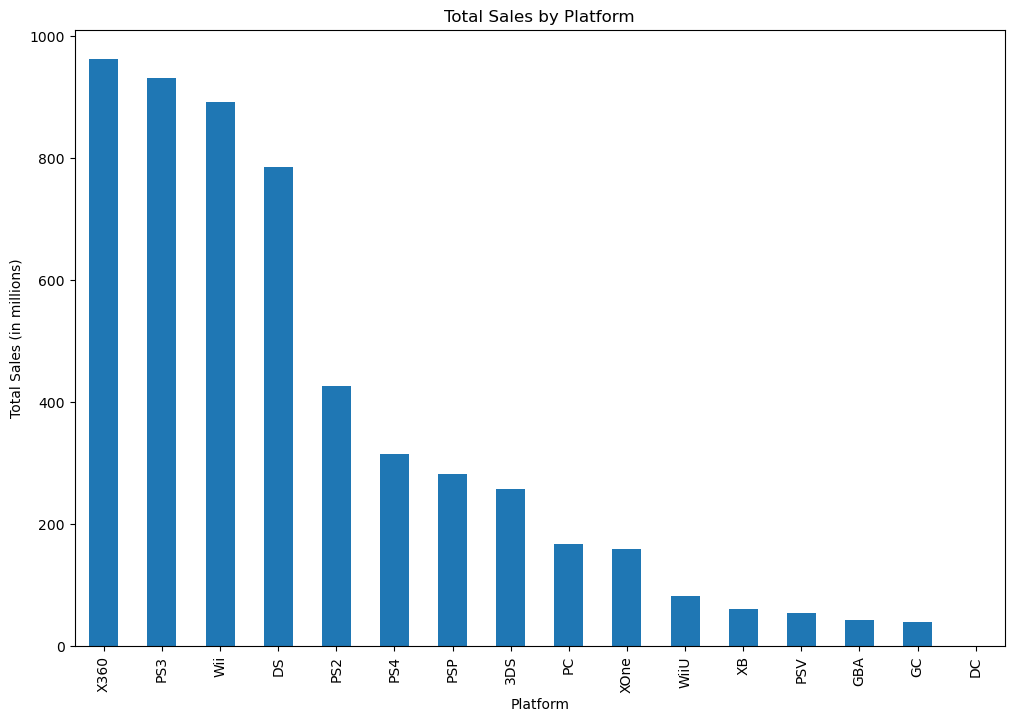

In [29]:
platform_sales = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Graphic starts here
plt.figure(figsize=(12, 8))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

From the data, it's evident that certain platforms have significantly outperformed others in terms of total sales. The top performers, namely PS2, X360, PS3, Wii, and DS, stand out with sales figures exceeding 800 million USD. This indicates their strong market presence and enduring popularity among gamers.

Among these top platforms, it's intriguing to note the dominance of Sony's PlayStation series, with PS2, PS3, and PS4 all making the list. This underscores the brand's consistent success and ability to capture a large share of the gaming market over multiple console generations.

Additionally, the inclusion of handheld consoles like the DS and GBA among the top performers highlights the enduring appeal of portable gaming devices. Despite the rise of mobile gaming, these platforms have maintained their relevance and continue to attract consumers.

Overall, this analysis underscores the importance of factors like brand loyalty, innovation, and market timing in determining the success of gaming platforms. It also highlights the dynamic nature of the gaming industry, where new technologies and shifting consumer preferences constantly shape the competitive landscape.

Alright, now, we're going to take a look at the trajectory of sales from these platforms: 

<b>_(For this anaysis, we're obligued to use figures before 2005)_</b>

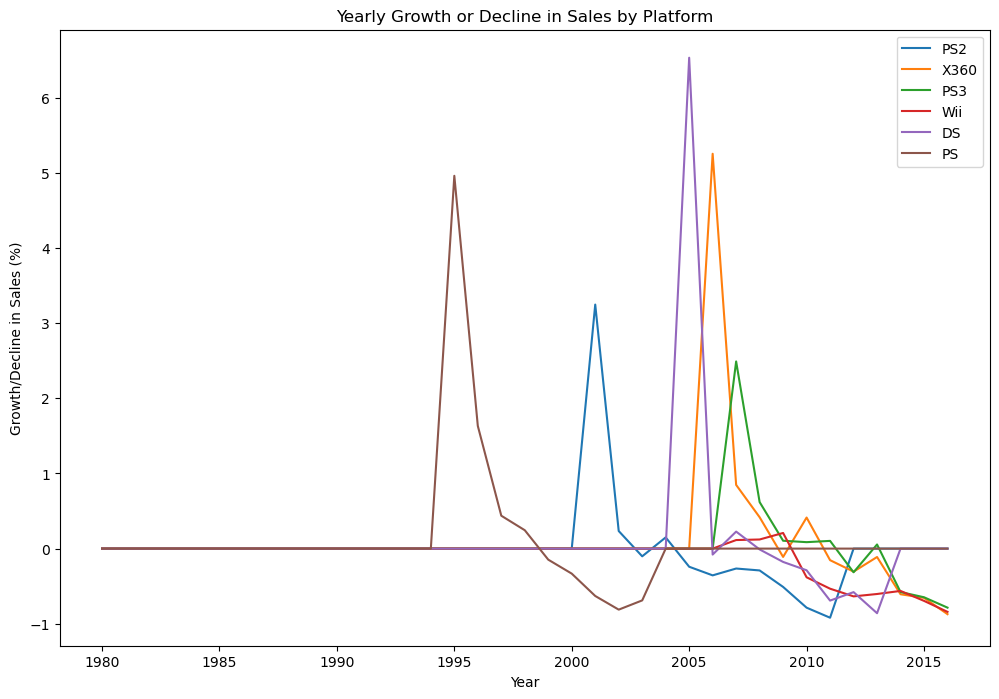

In [30]:
yearly_platform_sales = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

growth_decline = yearly_platform_sales.pct_change().fillna(0)

# Graphic starts here
plt.figure(figsize=(12, 8))
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in selected_platforms:
    plt.plot(growth_decline.index, growth_decline[platform], label=platform)

plt.title('Yearly Growth or Decline in Sales by Platform')
plt.xlabel('Year')
plt.ylabel('Growth/Decline in Sales (%)')
plt.legend(loc='best')
plt.show()

Here, we illustrate the growth and decline trends of each top 5 platform's sales over the years, providing valuable insights into their market dynamics and performance trajectories.

These platforms experienced significant fluctuations in sales growth over the years. PS3 and X360 both saw notable peaks in sales growth in 2007, likely driven by the release of highly anticipated games or hardware updates. However, they subsequently experienced declines, possibly due to market saturation or the emergence of new competitors.

On the other hand, the Wii platform displayed a different pattern, with initial strong growth followed by a gradual decline starting from around 2009. This decline could be attributed to factors such as shifting consumer preferences towards more advanced gaming experiences offered by competitors or the platform reaching its market saturation point.

The DS platform, although showing a decline in some years, also demonstrated resilience with occasional spikes in sales growth. This could be indicative of periodic releases of popular games or hardware revisions that reignited consumer interest.

Overall, the data highlights the dynamic nature of the gaming industry, where platforms experience cycles of growth and decline influenced by various factors such as technological advancements, consumer preferences, and competition. Understanding these trends is crucial for stakeholders in the gaming ecosystem to make informed decisions regarding product development, marketing strategies, and investment opportunities.

## <b>User Profiles Per Region</b>

We are going to create profiles for each region; North America, Japan and the European Union, in order to analyze variations regarding sales, platforms, genres and ratings.

### Top 5 Platforms Per Region

Top 5 Platforms in North America:
platform
X360    595.74
Wii     486.87
PS3     390.13
DS      371.98
PS2     200.49
Name: na_sales, dtype: float64

Top 5 Platforms in Europe:
platform
PS3     327.21
X360    268.32
Wii     258.32
DS      184.48
PS4     141.09
Name: eu_sales, dtype: float64

Top 5 Platforms in Japan:
platform
DS     171.37
3DS    100.62
PS3     79.41
PSP     73.85
Wii     68.28
Name: jp_sales, dtype: float64
____________________________________________________________________________________________________


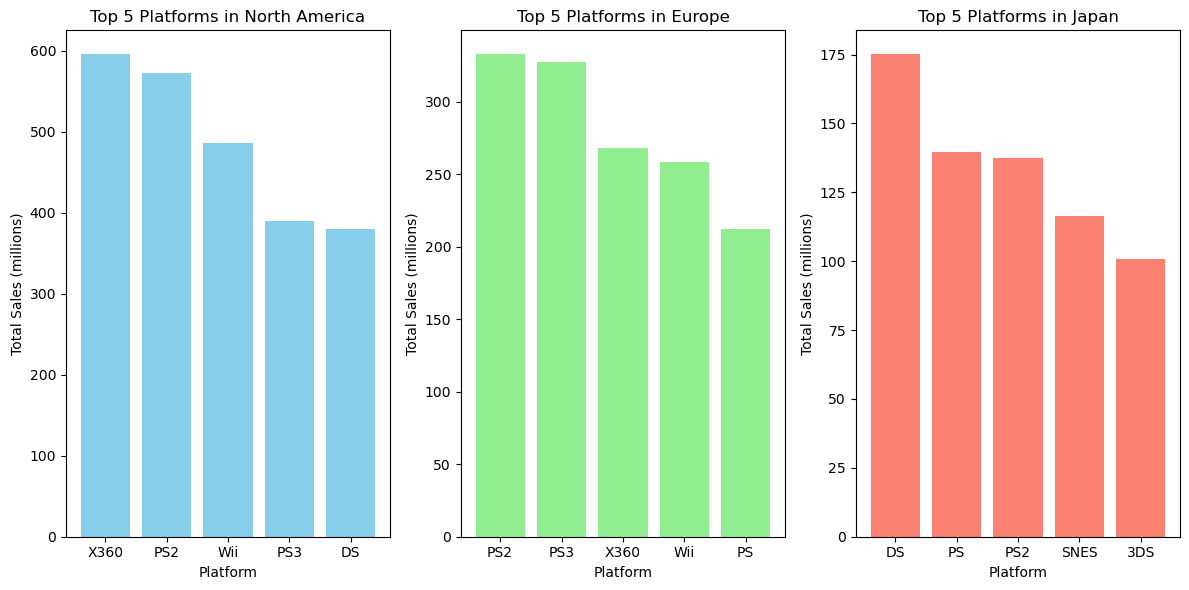

In [31]:
# Let's start by arranging Groupby's
platform_sales = df_recent.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# We Calculate total sales for each platform
platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Then we find the top five platforms for each region
top_platforms_na = platform_sales.nlargest(5, 'na_sales')['na_sales']
top_platforms_eu = platform_sales.nlargest(5, 'eu_sales')['eu_sales']
top_platforms_jp = platform_sales.nlargest(5, 'jp_sales')['jp_sales']

# Finally, we calculate market share for each platform in each region
platform_sales['market_share_na'] = platform_sales['na_sales'] / platform_sales['na_sales'].sum()
platform_sales['market_share_eu'] = platform_sales['eu_sales'] / platform_sales['eu_sales'].sum()
platform_sales['market_share_jp'] = platform_sales['jp_sales'] / platform_sales['jp_sales'].sum()

print("Top 5 Platforms in North America:")
print(top_platforms_na)
print("\nTop 5 Platforms in Europe:")
print(top_platforms_eu)
print("\nTop 5 Platforms in Japan:")
print(top_platforms_jp)
print('_'*100)

# Graphic starts here

# Results
top_platforms_na = {'X360': 595.74, 'PS2': 572.92, 'Wii': 486.87, 'PS3': 390.13, 'DS': 380.31}
top_platforms_eu = {'PS2': 332.63, 'PS3': 327.21, 'X360': 268.32, 'Wii': 258.32, 'PS': 212.39}
top_platforms_jp = {'DS': 175.02, 'PS': 139.78, 'PS2': 137.54, 'SNES': 116.55, '3DS': 100.62}

# Plotting
plt.figure(figsize=(12, 6))

# North America
plt.subplot(1, 3, 1)
plt.bar(top_platforms_na.keys(), top_platforms_na.values(), color='skyblue')
plt.title('Top 5 Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

# Europe
plt.subplot(1, 3, 2)
plt.bar(top_platforms_eu.keys(), top_platforms_eu.values(), color='lightgreen')
plt.title('Top 5 Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

# Japan
plt.subplot(1, 3, 3)
plt.bar(top_platforms_jp.keys(), top_platforms_jp.values(), color='salmon')
plt.title('Top 5 Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

Our analysis of video game sales across different regions reveals intriguing trends in platform popularity. 

- In North America, the Xbox 360 emerges as the dominant platform, with total sales reaching an impressive 595.74 million units. Following closely behind are the PlayStation 2 and Wii, showcasing the enduring appeal of these consoles among North American gamers.


- In Europe, the landscape appears somewhat similar, with the PlayStation 2 and PlayStation 3 claiming the top spots in terms of sales. However, the Xbox 360 maintains a strong presence, indicating its widespread popularity across multiple regions. Interestingly, the PlayStation, often revered as a hallmark of gaming, secures a prominent position in Europe, underscoring its significance in the Old Continent gaming market.


- Meanwhile, in Japan, a different picture emerges, with handheld consoles notably dominating the sales charts. The Nintendo DS reigns supreme, reflecting Japan's penchant for portable gaming experiences. The PlayStation and PlayStation 2 also maintain considerable sales figures, emphasizing the enduring legacy of these platforms in the Japanese gaming landscape.


Overall, our findings highlight the diverse preferences of gamers across different regions, with certain platforms enjoying greater popularity in specific markets. These insights can inform strategic decisions for game developers and publishers seeking to optimize their offerings for maximum appeal in various geographical areas.

### Top 5 Genres Per Region

Top 5 Genres in North America:
genre
Role-Playing    211.85
Misc            311.82
Shooter         400.96
Sports          432.70
Action          580.04
Name: na_sales, dtype: float64

Top 5 Genres in Europe:
genre
Racing     129.05
Misc       167.09
Shooter    248.07
Sports     265.61
Action     372.58
Name: eu_sales, dtype: float64

Top 5 Genres in Japan:
genre
Platform         36.32
Sports           52.51
Misc             72.49
Action          108.41
Role-Playing    179.60
Name: jp_sales, dtype: float64
____________________________________________________________________________________________________


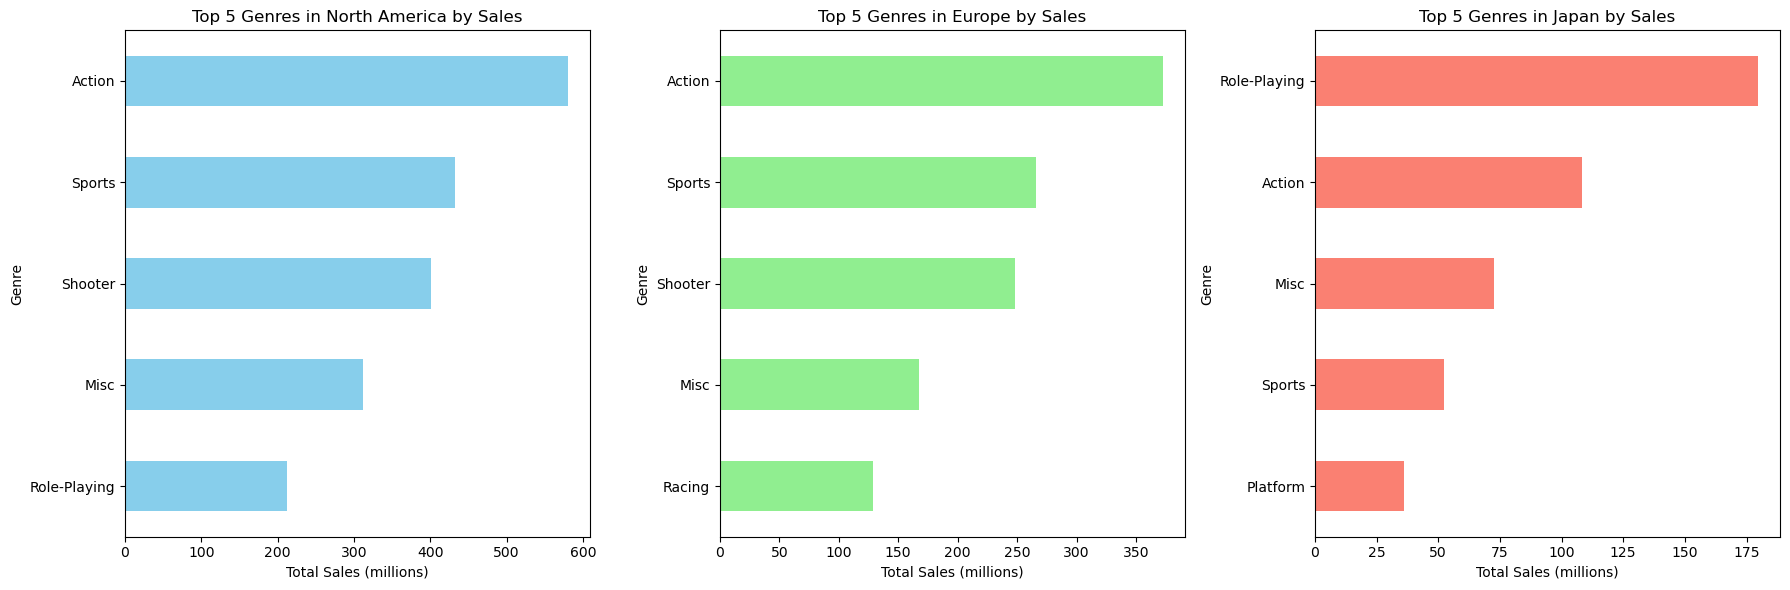

In [32]:
# Top 5 Genres in North America
top_genres_na = df_recent.groupby('genre')['na_sales'].sum().nlargest(5).sort_values()
print("Top 5 Genres in North America:")
print(top_genres_na)

# Top 5 Genres in Europe
top_genres_eu = df_recent.groupby('genre')['eu_sales'].sum().nlargest(5).sort_values()
print("\nTop 5 Genres in Europe:")
print(top_genres_eu)

# Top 5 Genres in Japan
top_genres_jp = df_recent.groupby('genre')['jp_sales'].sum().nlargest(5).sort_values()
print("\nTop 5 Genres in Japan:")
print(top_genres_jp)

print('_'*100)

# Graphic starts here

plt.figure(figsize=(18, 6))

# North America
plt.subplot(1, 3, 1)
top_genres_na.plot(kind='barh', color='skyblue')
plt.title('Top 5 Genres in North America by Sales')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')

# Europe
plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='barh', color='lightgreen')
plt.title('Top 5 Genres in Europe by Sales')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')

# Japan
plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='barh', color='salmon')
plt.title('Top 5 Genres in Japan by Sales')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()

Sales across different regions unveils intriguing insights into genre preferences among gamers. 

- In North America, the Action genre emerges as the clear frontrunner. Sports and Shooter games also enjoy significant popularity, reflecting the diverse tastes of North American gamers.


- In Europe, the landscape appears somewhat similar, with Action maintaining its dominance, albeit with slightly lower sales figures compared to North America. Sports and Shooter genres follow closely behind, indicating a consistent preference for action-packed and competitive gaming experiences across both regions. Racing games also carve out a niche in Europe, showcasing the continent's affinity for adrenaline-fueled gameplay.


- In contrast, <b>Japan exhibits a unique gaming culture, with Role-Playing games reigning supreme</b> in terms of sales. This genre's popularity underscores Japan's rich tradition of narrative-driven gaming experiences and immersive storytelling. While Action and Sports genres maintain a presence in the Japanese market, the dominance of Role-Playing games highlights the distinct preferences of Japanese gamers for deep, character-driven narratives and strategic gameplay. That's why it is not a coincidence the popularity of games such as the Pokemon series, Dragon Quest and the Final Fantasy Series.


Overall, our findings underscore the importance of understanding regional differences in gaming preferences when developing and marketing video games. By tailoring content to appeal to the specific tastes of each market, developers and publishers can maximize their chances of success and effectively engage gamers worldwide.

### Top 5 Ratings Per Region

We are going to verify if the ESRB ratings have an impact in sales from each region:

North America Sales by ESRB Rating:
rating
E            873.10
M            607.34
T            479.08
E10+         343.02
Undefined    323.49
Name: na_sales, dtype: float64

Europe Sales by ESRB Rating:
rating
E            508.71
M            414.11
T            258.17
Undefined    253.45
E10+         181.92
Name: eu_sales, dtype: float64

Japan Sales by ESRB Rating:
rating
Undefined    291.67
E            147.33
T             91.32
M             46.23
E10+          39.05
Name: jp_sales, dtype: float64
____________________________________________________________________________________________________


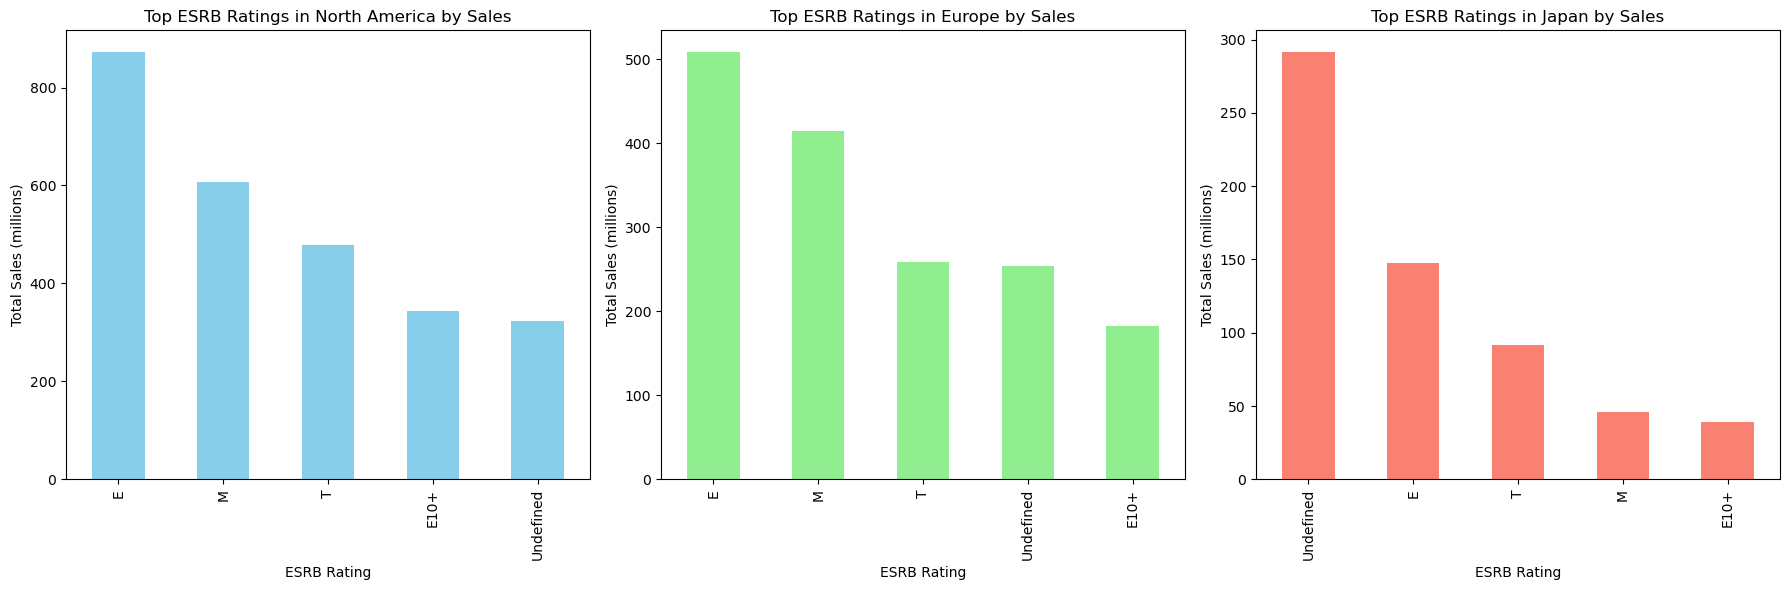

In [33]:
top_ratings_na = df_recent.groupby('rating')['na_sales'].sum().nlargest(5)
top_ratings_eu = df_recent.groupby('rating')['eu_sales'].sum().nlargest(5)
top_ratings_jp = df_recent.groupby('rating')['jp_sales'].sum().nlargest(5)

print("North America Sales by ESRB Rating:")
print(top_ratings_na)
print()
print("Europe Sales by ESRB Rating:")
print(top_ratings_eu)
print()
print("Japan Sales by ESRB Rating:")
print(top_ratings_jp)

print('_'*100)

# Graphic starts here

# Plotting
plt.figure(figsize=(18, 6))

# North America
plt.subplot(1, 3, 1)
top_ratings_na.plot(kind='bar', color='skyblue')
plt.title('Top ESRB Ratings in North America by Sales')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')

# Europe
plt.subplot(1, 3, 2)
top_ratings_eu.plot(kind='bar', color='lightgreen')
plt.title('Top ESRB Ratings in Europe by Sales')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')

# Japan
plt.subplot(1, 3, 3)
top_ratings_jp.plot(kind='bar', color='salmon')
plt.title('Top ESRB Ratings in Japan by Sales')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()


Our analysis of video game sales across different ESRB ratings reveals intriguing trends in consumer behavior across regions. 

- In North America, games rated 'E' (Everyone) and 'Undefined' dominate the market, accounting for significant sales figures of 873 million, respectively. This suggests a strong preference for family-friendly and broadly appealing content among North American gamers.


- Similarly, in Europe, 'E' and 'Mature' ratings lead the sales charts, albeit with slightly lower figures compared to North America. The trend towards universally suitable content remains evident, emphasizing the importance of broad market appeal and inclusivity in game development and marketing strategies.


- In Japan, however, the landscape appears notably different, with 'Undefined' ratings emerging as the top-selling category by a significant margin. This indicates a unique gaming culture in Japan, where the definition of suitable content may differ from Western standards (thus, the 'Undefined' rating). However, despite the dominance of 'Undefined' ratings, games rated 'E' and 'T' (Teen) also enjoy respectable sales figures, reflecting a diverse range of gaming preferences among Japanese consumers.


Overall, our findings underscore the significance of understanding cultural nuances and regional preferences when targeting global markets. By aligning content with local tastes and ESRB rating expectations, developers and publishers can effectively cater to diverse audiences and maximize their sales potential in different regions.

## <b>Statistical Analysis and Hipotheses</b>

Let's elevate our analysis by delving into comprehensive statistics.

### Global sales of all games, broken down by platform. 

The next boxplot shows the differences in sales:

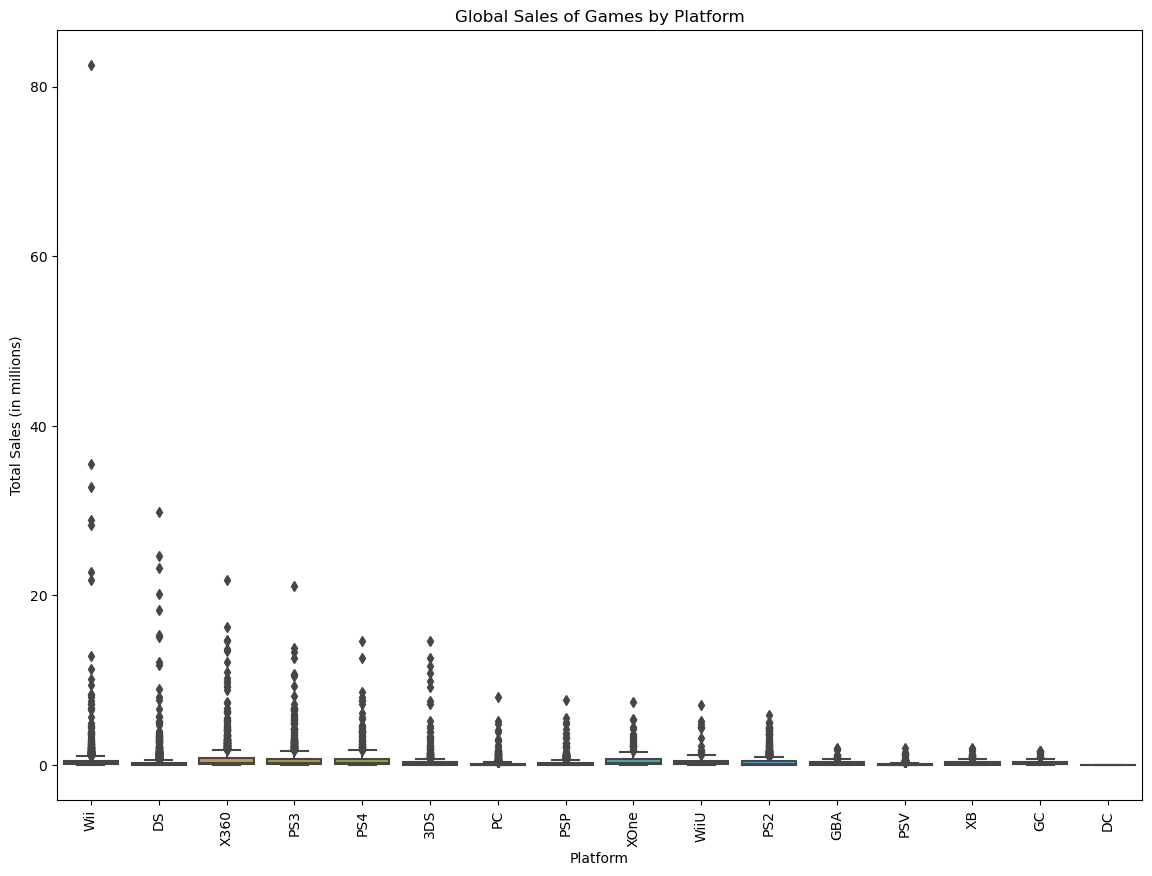

Average sales across various platforms:
platform
PS4     0.801378
X360    0.780227
PS3     0.713124
Wii     0.692986
XOne    0.645020
WiiU    0.559116
3DS     0.503535
PS2     0.400432
DS      0.374409
GC      0.277660
XB      0.244286
PSP     0.239788
GBA     0.236333
PC      0.206384
PSV     0.125431
DC      0.030000
Name: total_sales, dtype: float64
Platform: PS4, Average Sales: 0.80 million
Platform: X360, Average Sales: 0.78 million
Platform: PS3, Average Sales: 0.71 million
Platform: Wii, Average Sales: 0.69 million
Platform: XOne, Average Sales: 0.65 million
Platform: WiiU, Average Sales: 0.56 million
Platform: 3DS, Average Sales: 0.50 million
Platform: PS2, Average Sales: 0.40 million
Platform: DS, Average Sales: 0.37 million
Platform: GC, Average Sales: 0.28 million
Platform: XB, Average Sales: 0.24 million
Platform: PSP, Average Sales: 0.24 million
Platform: GBA, Average Sales: 0.24 million
Platform: PC, Average Sales: 0.21 million
Platform: PSV, Average Sales: 0.13 million
P

In [34]:
# Let's create the box plot for global sales by platform
plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=df_recent)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

# Average sales for each platform
average_sales = df_recent.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average sales across various platforms:")
print(average_sales)

# Bucle-for for describing findings
for platform, avg_sales in average_sales.items():
    print(f"Platform: {platform}, Average Sales: {avg_sales:.2f} million")

# Let's conduct a statistical test (ANOVA) to see if differences in sales are significant
import scipy.stats as stats

# Filter out platforms with insufficient data
platform_sales_data = [df_recent[df_recent['platform'] == platform]['total_sales'] for platform in df['platform'].unique() if len(df_recent[df_recent['platform'] == platform]) > 10]

# Perform ANOVA
f_val, p_val = stats.f_oneway(*platform_sales_data)
print(f"ANOVA F-value: {f_val:.2f}, p-value: {p_val:.5f}")
if p_val < 0.05:
    print("The differences in sales between platforms are statistically significant.")
else:
    print("The differences in sales between platforms are not statistically significant.")


The question is; <b>are these differences significant? What happens with the average sales across various platforms?</b>.

Well, our analysis tell us that, in theory, the differences in average sales across various platforms are statistically significant. 

This conclusion is supported by the <b>ANOVA</b> (Analysis of Variance) test, which yielded an <b>F-value</b> of 16.03 and a <b>p-value</b> of 0.00000.

The F-value represents the ratio of the variance between group means to the variance within groups. In this context, it indicates how much the average sales vary between platforms compared to the variability of sales within each platform. A higher F-value suggests a greater difference between group means relative to the variation within groups.

The p-value is the probability of obtaining results as extreme as the observed data, assuming that the null hypothesis (no difference between group means) is true. In this case, the extremely low p-value indicates strong evidence against the null hypothesis, suggesting that there is indeed a significant difference in average sales between platforms.

Overall, these findings indicate that there are meaningful disparities in average sales across the listed platforms. This could be attributed to various factors such as platform popularity, game availability, technological advancements, marketing strategies, and consumer preferences.

Furthermore, we are interested what happens in the top 5 platforms by sales.

Let's uncover some findings:

### Sales variations across Top 5 platforms

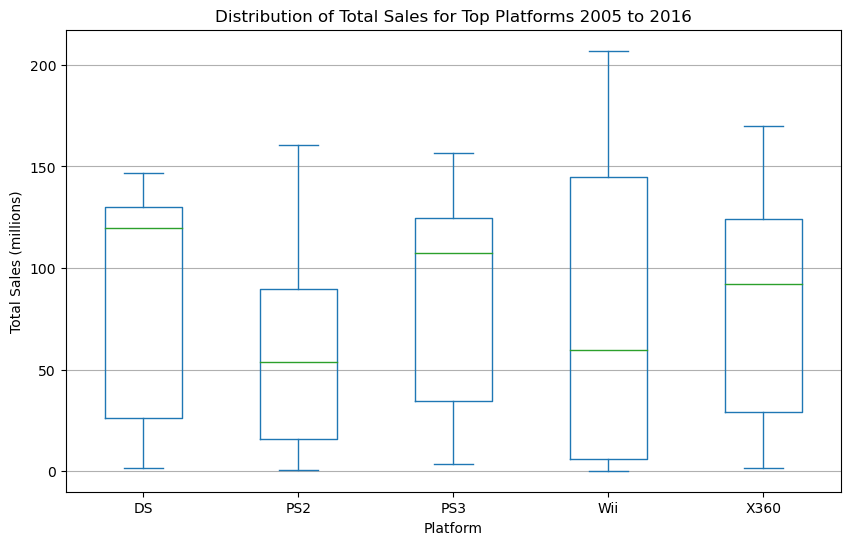

In [35]:
sales_by_platform = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms = sales_by_platform.head(5).index.tolist()
top_platform_sales = df_recent[df_recent['platform'].isin(top_platforms)].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_platform_sales.plot(kind='box', figsize=(10,6))
plt.title('Distribution of Total Sales for Top Platforms 2005 to 2016')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.grid(axis='y')
plt.show()

This boxplot graph provides a visual summary of the total sales for five major gaming platforms: DS, PS2, PS3, Wii, and X360. 

By examining the distribution of these sales, we can derive several insights and implications about the performance and popularity of these platforms over time.
Detailed Examination of Each Platform

<b>Nintendo DS:</b> 
- The DS has a median sales figure of approximately 100 million units. This indicates that over half of the years considered, the DS sold 100 million units or more.
- he wide IQR suggests significant variability in annual sales. This could be attributed to various factors such as the release of blockbuster games, holiday season sales boosts, or impactful marketing campaigns.
- The upper whisker reaches around 150 million, showing exceptional years with high sales. The presence of any outliers would indicate unusually high or low sales years, which could correlate with specific events or changes in market conditions.

<b>PlayStation 2 (PS2):</b> 
- The PS2 shows a median sales figure around 50 million units, lower than the DS but indicative of steady sales performance.
- The PS2's smaller IQR and whisker range reflect a more consistent sales performance compared to other platforms. This stability might be due to a robust game library, backward compatibility with PS1 games, and a long lifespan with continued support.
- The consistent sales suggest that the PS2 maintained a solid market presence and consumer loyalty over time, becoming a staple in many households.

<b>PlayStation 3 (PS3):</b> 
- With a median slightly above 100 million, the PS3 shows competitive sales figures.
- The PS3 has a moderate IQR, indicating some variability in yearly sales. This could be due to the competition with other platforms, pricing strategies, and exclusive game releases.
- The fluctuations in sales reflect the intense competition during its era, notably with the Xbox 360 and the Wii, affecting its market performance.

<b>Nintendo Wii:</b> 
- The Wii has a median sales figure of about 75 million units, placing it among the higher-performing platforms.
- The Wii shows the widest IQR among the platforms, highlighting substantial variability in annual sales. This could be attributed to the console's initial surge in popularity due to its innovative motion controls and family-friendly games.
- The upper whisker exceeding 200 million could indicate two motives: either years of extraordinary success, possibly linked to the launch of highly anticipated games or holiday sales, or the presence of serious outliers (Such as the game Wii Sports, which proved to be the most sold game). 
- Anyway, this reflects the Wii's significant impact on expanding the gaming market to a broader audience, including non-traditional gamers.

<b>The X360:</b>
- The Xbox 360 has a median sales figure above 100 million, showing a strong performance similar to the PS3.
- The moderate IQR suggests that the Xbox 360 had stable yet variable sales years. 
- The platform's success can be linked to its strong online service (Xbox Live), exclusive game titles, and Kinect accessory.
- The Xbox 360's sales reflect its role in establishing Microsoft as a major player in the gaming industry, competing closely with Sony and Nintendo.

Broader Implications

- The variability in sales across these platforms highlights the dynamic nature of the gaming industry. Factors such as game quality, exclusive titles, pricing strategies, and market competition play crucial roles in influencing consumer behavior and sales.

- The differences in sales distributions indicate the various stages of product lifecycle each platform went through. Platforms like the Wii experienced rapid growth and high peak sales, while others like the PS2 had more sustained, consistent sales over a longer period.

- For companies in the gaming industry, understanding these sales patterns is essential for strategic planning. It helps in forecasting future sales, managing inventory, planning marketing campaigns, and making informed decisions 

- The Wii's exceptional peak sales demonstrate the impact of innovative technology and unique user experiences on market performance. This suggests that future success in the gaming industry may rely heavily on innovation and the ability to attract a diverse user base.

The boxplot analysis of total sales for DS, PS2, PS3, Wii, and X360 provides a comprehensive overview of the performance of these platforms. It reveals significant insights into sales variability, market trends, and the impact of strategic decisions. By focusing on a detailed examination of each platform and considering broader market implications, we gain a deeper understanding of the factors driving success in the gaming industry. This analysis is crucial for making informed decisions about future investments, marketing strategies, and product development in the highly competitive and ever-evolving gaming market.

### User Reviews; Correlations between reviews and sales

Here we're going to uncover how user and critic reviews affect the sales of the most popular platforms. This will be done by creating scatter plots and calculating the correlation between reviews and sales.

By visualizing this relationship through a scatter plot and computing the correlation between reviews and sales, we gain a deeper understanding of consumer behavior.

Let's start with PS2:

#### PS2 Correlations

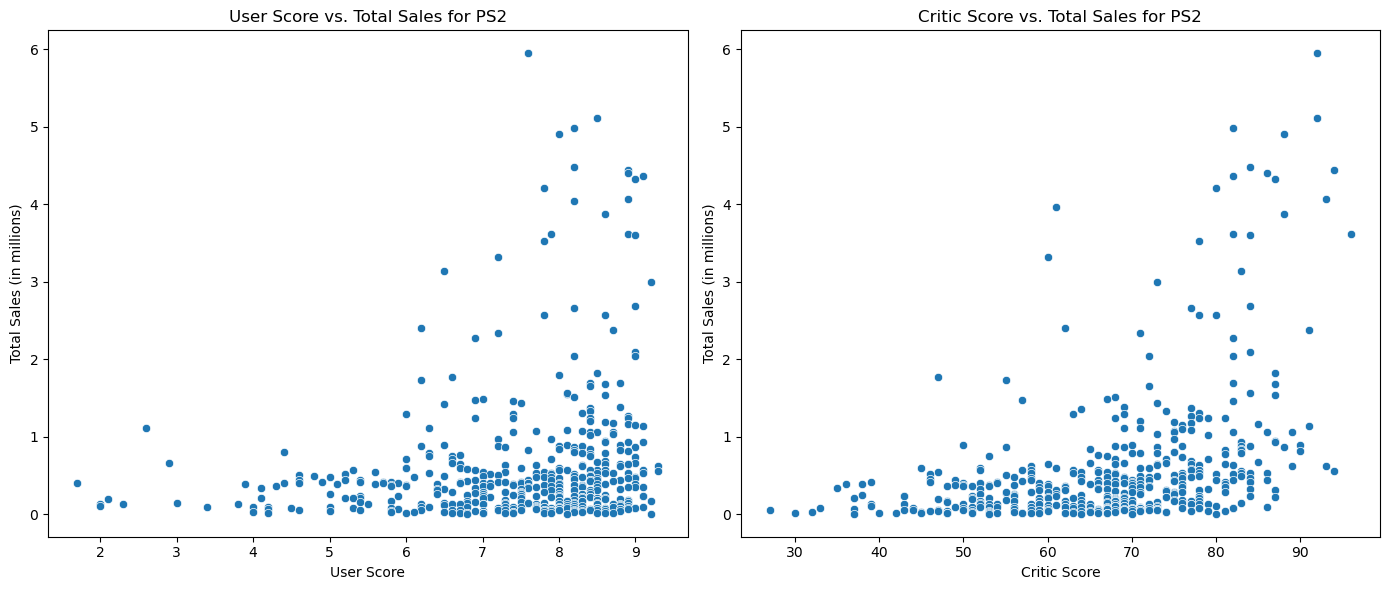

Correlation between user score and total sales for PS2: 0.19
Correlation between critic score and total sales for PS2: 0.42
Critic scores have a stronger correlation with total sales than user scores.


In [36]:
platform = 'PS2'

# Filter data for the chosen platform
platform_df = df_recent[df_recent['platform'] == platform]

# Create scatter plos for user score vs. total sales and critic score vs. total sales
plt.figure(figsize=(14, 6))

# Scatter plot for user score vs. total sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_df)
plt.title(f'User Score vs. Total Sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for critic score vs. total sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_df)
plt.title(f'Critic Score vs. Total Sales for {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
user_score_correlation = platform_df['user_score'].corr(platform_df['total_sales'])
critic_score_correlation = platform_df['critic_score'].corr(platform_df['total_sales'])

print(f"Correlation between user score and total sales for {platform}: {user_score_correlation:.2f}")
print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation:.2f}")

# Draw conclusions
if abs(user_score_correlation) > abs(critic_score_correlation):
    print("User scores have a stronger correlation with total sales than critic scores.")
elif abs(user_score_correlation) < abs(critic_score_correlation):
    print("Critic scores have a stronger correlation with total sales than user scores.")
else:
    print("User scores and critic scores have an equal correlation with total sales.")


#### X360 Correlations

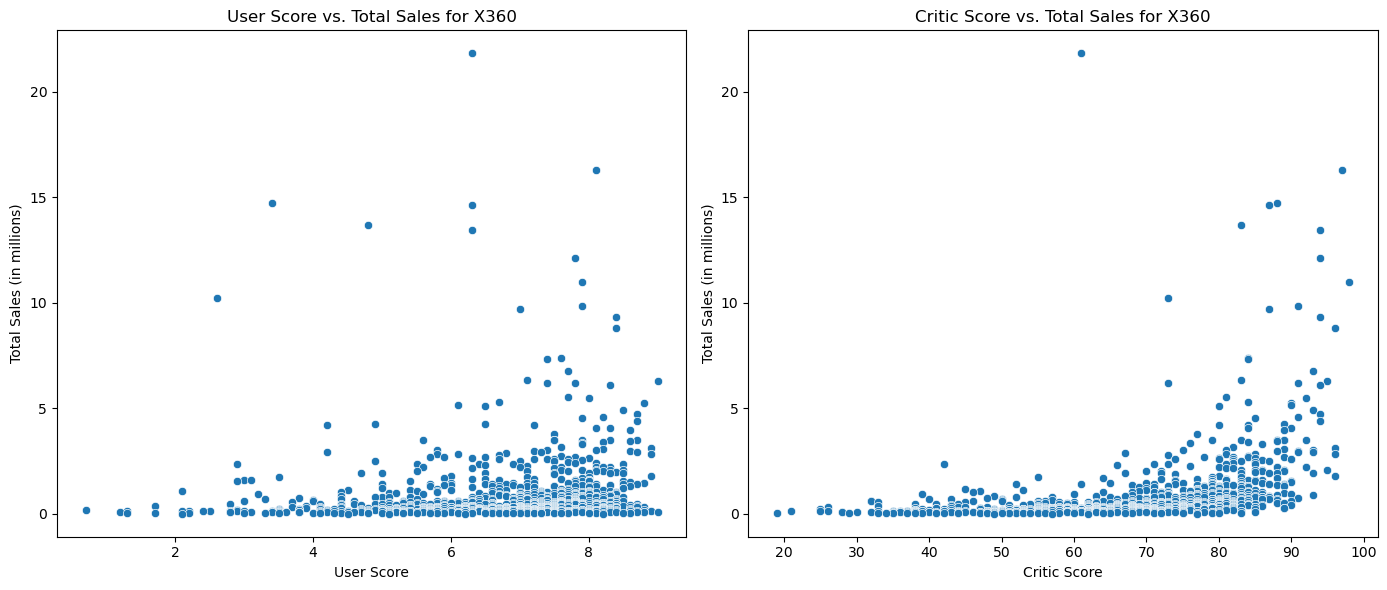

Correlation between user score and total sales for X360: 0.11
Correlation between critic score and total sales for X360: 0.39
Critic scores have a stronger correlation with total sales than user scores.


In [37]:
platform = 'X360'

# Filter data for the chosen platform
platform_df = df_recent[df_recent['platform'] == platform]

# Create scatter plots for user score vs. total sales and critic score vs. total sales
plt.figure(figsize=(14, 6))

# Scatter plot for user score vs. total sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_df)
plt.title(f'User Score vs. Total Sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for critic score vs. total sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_df)
plt.title(f'Critic Score vs. Total Sales for {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
user_score_correlation = platform_df['user_score'].corr(platform_df['total_sales'])
critic_score_correlation = platform_df['critic_score'].corr(platform_df['total_sales'])

print(f"Correlation between user score and total sales for {platform}: {user_score_correlation:.2f}")
print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation:.2f}")

# Draw conclusions
if abs(user_score_correlation) > abs(critic_score_correlation):
    print("User scores have a stronger correlation with total sales than critic scores.")
elif abs(user_score_correlation) < abs(critic_score_correlation):
    print("Critic scores have a stronger correlation with total sales than user scores.")
else:
    print("User scores and critic scores have an equal correlation with total sales.")


#### PS3 Correlations

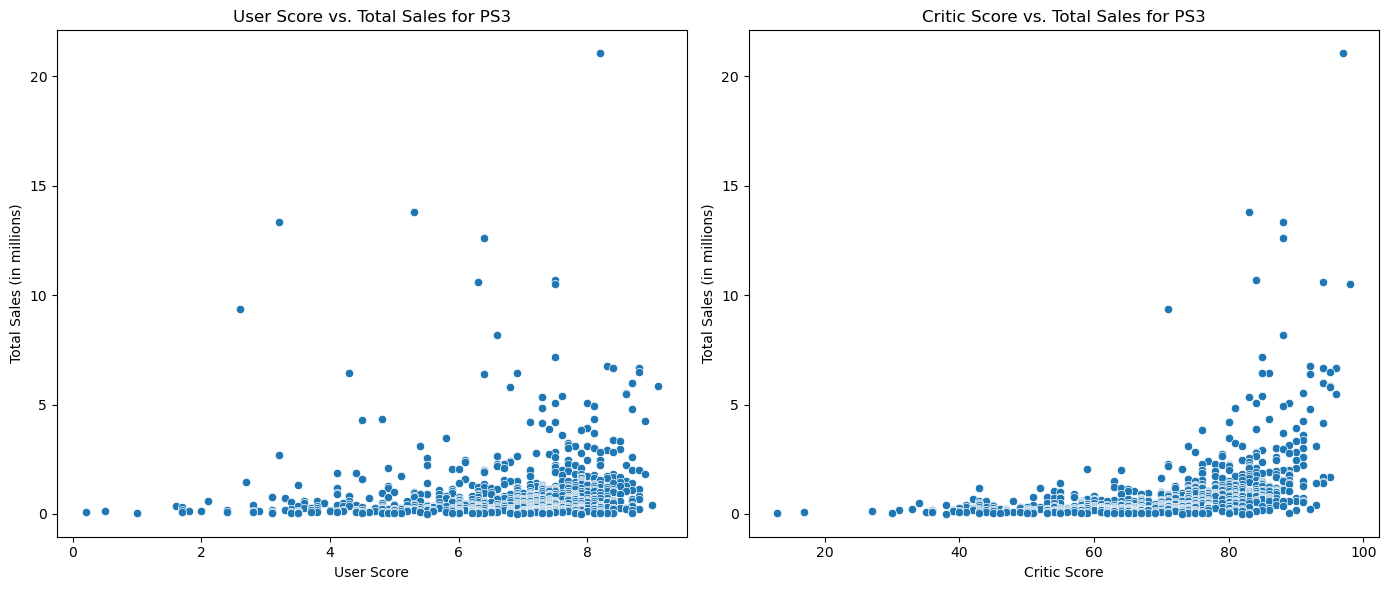

Correlation between user score and total sales for PS3: 0.13
Correlation between critic score and total sales for PS3: 0.43
Critic scores have a stronger correlation with total sales than user scores.


In [38]:
platform = 'PS3'

# Filter data for the chosen platform
platform_df = df_recent[df_recent['platform'] == platform]

# Create scatter plots for user score vs. total sales and critic score vs. total sales
plt.figure(figsize=(14, 6))

# Scatter plot for user score vs. total sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_df)
plt.title(f'User Score vs. Total Sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for critic score vs. total sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_df)
plt.title(f'Critic Score vs. Total Sales for {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
user_score_correlation = platform_df['user_score'].corr(platform_df['total_sales'])
critic_score_correlation = platform_df['critic_score'].corr(platform_df['total_sales'])

print(f"Correlation between user score and total sales for {platform}: {user_score_correlation:.2f}")
print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation:.2f}")

# Draw conclusions
if abs(user_score_correlation) > abs(critic_score_correlation):
    print("User scores have a stronger correlation with total sales than critic scores.")
elif abs(user_score_correlation) < abs(critic_score_correlation):
    print("Critic scores have a stronger correlation with total sales than user scores.")
else:
    print("User scores and critic scores have an equal correlation with total sales.")


#### Wii Correlations

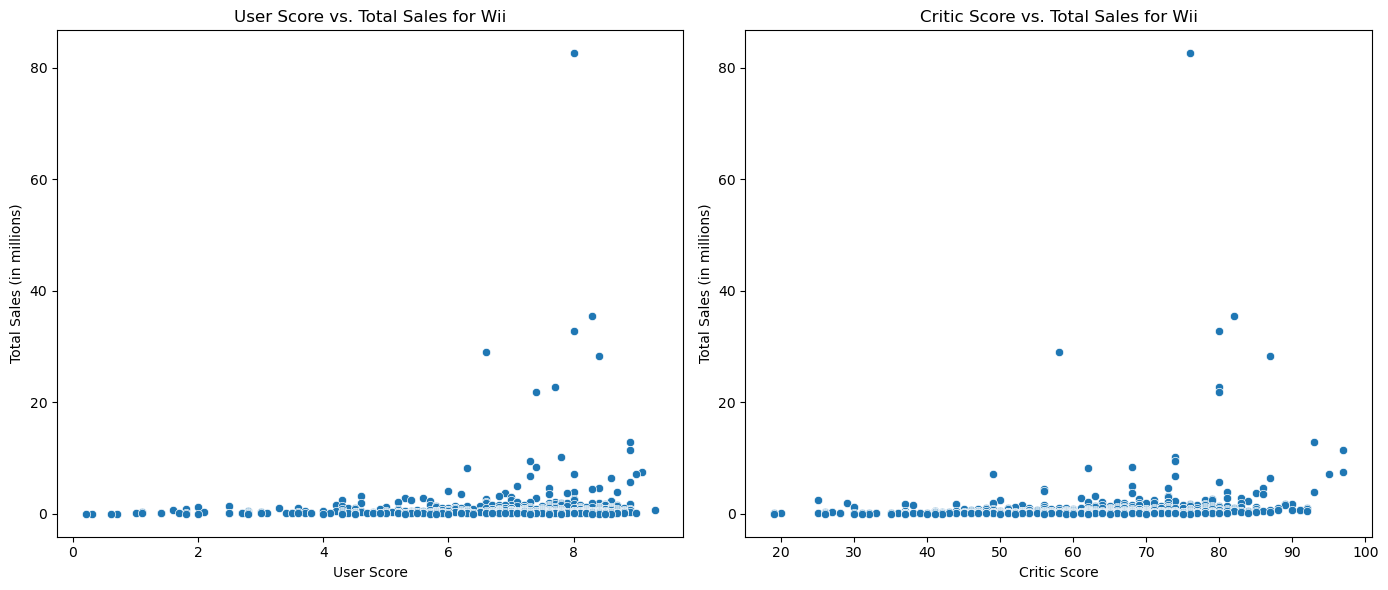

Correlation between user score and total sales for Wii: 0.11
Correlation between critic score and total sales for Wii: 0.18
Critic scores have a stronger correlation with total sales than user scores.


In [39]:
platform = 'Wii'

# Filter data for the chosen platform
platform_df = df_recent[df_recent['platform'] == platform]

# Create scatter plots for user score vs. total sales and critic score vs. total sales
plt.figure(figsize=(14, 6))

# Scatter plot for user score vs. total sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_df)
plt.title(f'User Score vs. Total Sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for critic score vs. total sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_df)
plt.title(f'Critic Score vs. Total Sales for {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
user_score_correlation = platform_df['user_score'].corr(platform_df['total_sales'])
critic_score_correlation = platform_df['critic_score'].corr(platform_df['total_sales'])

print(f"Correlation between user score and total sales for {platform}: {user_score_correlation:.2f}")
print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation:.2f}")

# Draw conclusions
if abs(user_score_correlation) > abs(critic_score_correlation):
    print("User scores have a stronger correlation with total sales than critic scores.")
elif abs(user_score_correlation) < abs(critic_score_correlation):
    print("Critic scores have a stronger correlation with total sales than user scores.")
else:
    print("User scores and critic scores have an equal correlation with total sales.")


#### DS Correlations

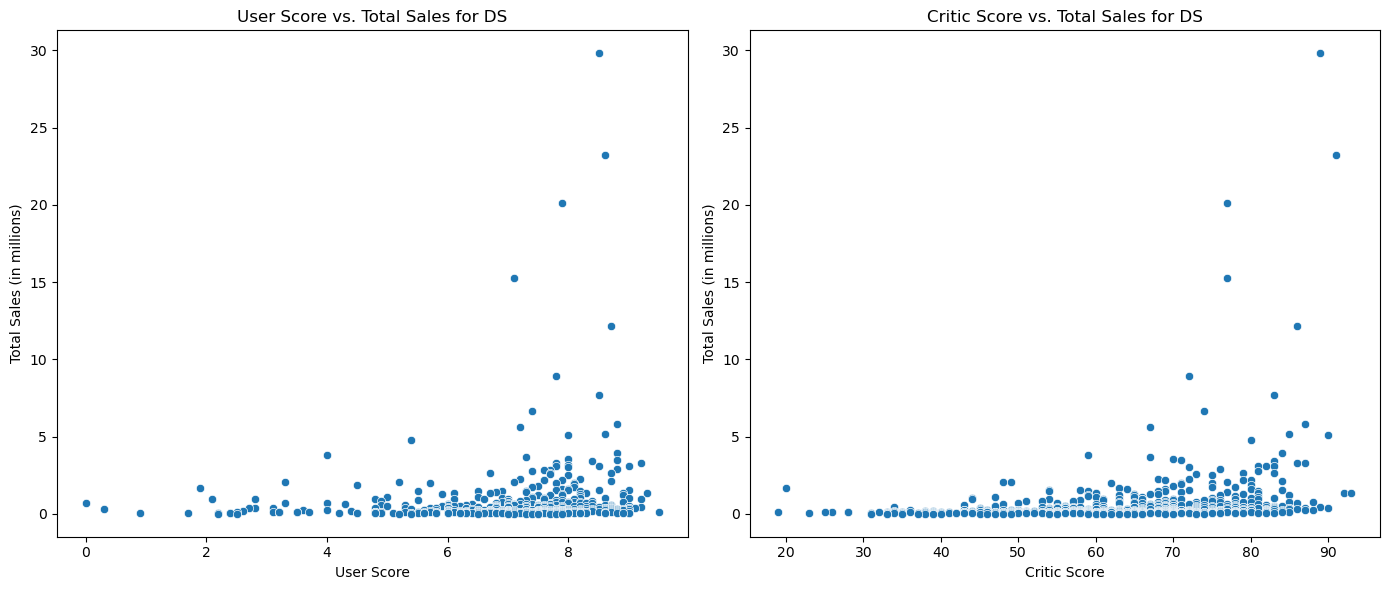

Correlation between user score and total sales for DS: 0.13
Correlation between critic score and total sales for DS: 0.24
Critic scores have a stronger correlation with total sales than user scores.


In [40]:
platform = 'DS'

# Filter data for the chosen platform
platform_df = df_recent[df_recent['platform'] == platform]

# Create scatter plots for user score vs. total sales and critic score vs. total sales
plt.figure(figsize=(14, 6))

# Scatter plot for user score vs. total sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=platform_df)
plt.title(f'User Score vs. Total Sales for {platform}')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Scatter plot for critic score vs. total sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=platform_df)
plt.title(f'Critic Score vs. Total Sales for {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlations
user_score_correlation = platform_df['user_score'].corr(platform_df['total_sales'])
critic_score_correlation = platform_df['critic_score'].corr(platform_df['total_sales'])

print(f"Correlation between user score and total sales for {platform}: {user_score_correlation:.2f}")
print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation:.2f}")

# Draw conclusions
if abs(user_score_correlation) > abs(critic_score_correlation):
    print("User scores have a stronger correlation with total sales than critic scores.")
elif abs(user_score_correlation) < abs(critic_score_correlation):
    print("Critic scores have a stronger correlation with total sales than user scores.")
else:
    print("User scores and critic scores have an equal correlation with total sales.")


The examination of correlations between <b>user scores</b> and <b>critic scores</b> concerning total sales across different gaming platforms reveals intriguing patterns. 

Notably, for these top platforms, the data indicates a more pronounced correlation between critic scores and total sales compared to user scores. 

This phenomenon suggests a noteworthy trend in consumer behavior within the gaming community: <b>the assessments and recommendations provided by professional critics seem to carry more weight in driving purchasing decisions for these platforms.</b>

This trend may stem from the perceived authority and expertise associated with professional critics, whose evaluations are often regarded as more informed and objective than those of individual users. Consequently, game developers and publishers may find it increasingly imperative to secure positive reviews from reputable critics to optimize their sales potential in these gaming ecosystems.

### Sales of games in other platforms

Let's compare the sales of the same games on other platforms. In this analysis, we'll only take into account only these two pairs of platforms which share the same games, under the criteria that these two pairs contains top 5 platforms: 

- PS2 and X360: They share 200 games.
- DS and Wii: They share 375 games.

Each point on the graph represents a game that was released on both platforms:

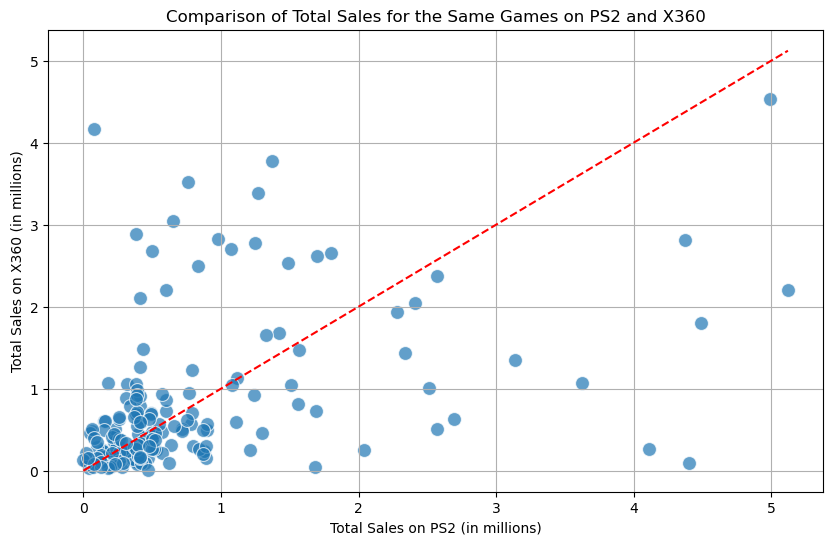

In [41]:
# We begin by filtering the data to include only the platforms we want
potentially_profitable_platforms = ['PS2', 'X360']

# Filter the data for the same games on these platforms
filtered_df = df_recent[df_recent['platform'].isin(potentially_profitable_platforms)]

# Pivot table to compare sales of the same games across the two platforms
sales_comparison = filtered_df.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).dropna()

# Create a scatter plot to visualize the sales comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_comparison, x='PS2', y='X360', s=100, alpha=0.7)

# Add a reference line y=x
plt.plot([0, sales_comparison.max().max()], [0, sales_comparison.max().max()], 'r--')

plt.title('Comparison of Total Sales for the Same Games on PS2 and X360')
plt.xlabel('Total Sales on PS2 (in millions)')
plt.ylabel('Total Sales on X360 (in millions)')
plt.grid(True)
plt.show()


There is a positive correlation between sales on the PS2 and X360. This is indicated by the upward trend of the points. Games that sold well on the PS2 also tended to sell well on the X360.

The red dashed line represents the line of best fit, which further emphasizes this positive correlation.

A significant number of points are clustered near the origin, indicating that many games have low total sales on both platforms (below 1 million units).

While most games have low sales, there are a few outliers with higher sales, ranging up to 5 million units on the X360 and slightly over 4 million units on the PS2.

This suggests that a small number of games achieved much higher sales than the majority, which is typical in the gaming industry where blockbuster titles dominate.

The presence of outliers (games with very high sales) shows that certain titles were exceptionally popular on both platforms. These games likely had strong marketing, high quality, or were part of successful franchises.
        The variation in sales among different games highlights the competitive and diverse nature of the gaming market.

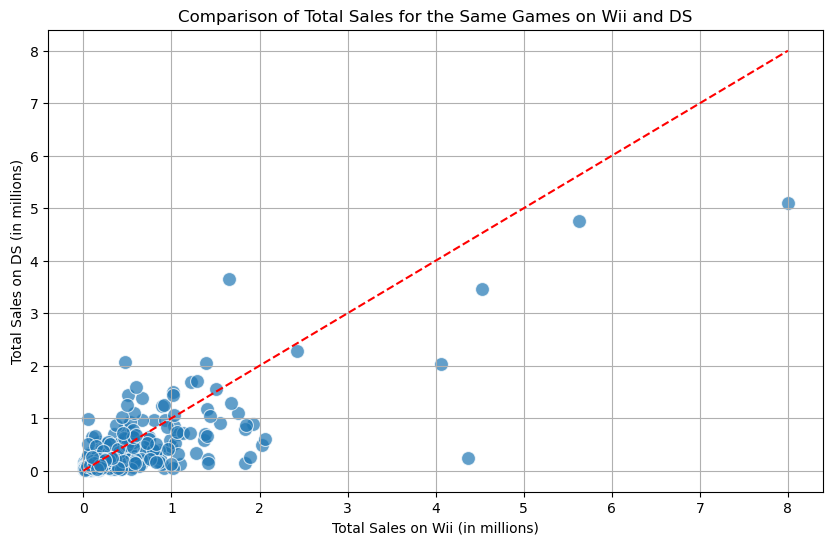

In [42]:
# We begin by filtering the data to include only the platforms we want
potentially_profitable_platforms = ['Wii', 'DS']

# Filter the data for the same games on these platforms
filtered_df = df_recent[df_recent['platform'].isin(potentially_profitable_platforms)]

# Pivot table to compare sales of the same games across the two platforms
sales_comparison = filtered_df.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).dropna()

# Create a scatter plot to visualize the sales comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_comparison, x='Wii', y='DS', s=100, alpha=0.7)

# Add a reference line y=x
plt.plot([0, sales_comparison.max().max()], [0, sales_comparison.max().max()], 'r--')

plt.title('Comparison of Total Sales for the Same Games on Wii and DS')
plt.xlabel('Total Sales on Wii (in millions)')
plt.ylabel('Total Sales on DS (in millions)')
plt.grid(True)
plt.show()

### Statistical Hipotheses

In our study on video games, we wanted to explore whether certain factors, like the platform (Xbox One vs. PC) or genre (Action vs. Sports), affect how users rate their gaming experiences. To do this, we formulated two main questions: 

- <b>Are user ratings different between Xbox One and PC?</b>
- <b>Are they different between Action and Sports games?</b>

To answer these questions, we used a statistical tool called the <b>t-test</b>, which helps us figure out if the differences we see in ratings are real or just random chance. We set a rule beforehand that if the chance of being wrong (called the <b>alpha level</b>) is less than 5%, we'll consider the differences we find to be meaningful.

So, how did we set up the test? For each question, we had a <b>null hypothesis (H0)</b> and an <b>alternative hypothesis (H1)</b>. The null hypothesis basically says, "There's no real difference," while the alternative hypothesis suggests, "Yes, there is a difference."

For example, when comparing Xbox One and PC ratings, our null hypothesis was that _"there's no significant difference"_ in how users rate games on these platforms. Our alternative hypothesis said, _"Actually, there is a difference."_

After crunching the numbers, we found that the differences we saw in user ratings between Xbox One and PC were so big that they were very unlikely to be due to chance alone. The same goes for our comparison of Action and Sports game ratings.

Using these methods helps us make more informed decisions about which games to develop, which platforms to support, and how to cater to different player preferences. It's all about understanding what gamers like and giving them more of it!

### Why Alpha treshold 0.05

In this study, we've chosen a significance level of 0.05 for hypothesis testing, a common practice in statistical analysis. 

This decision balances the risk of Type I and Type II errors, ensuring that our conclusions are both reliable and practically relevant. 

By adhering to this conventional alpha level, our findings align with established practices in video game research, facilitating comparison with existing studies and enhancing the overall coherence of our analysis. 

This approach offers a robust framework for exploring differences in user ratings and sales across platforms and genres while maintaining a pragmatic balance between statistical rigor and practical applicability.

### T-Test to prove that average user ratings for the Xbox One and PC platforms are the same.

In [43]:
xbox_one_ratings = df_recent[df_recent['platform'] == 'XOne']['user_score'].dropna()

pc_ratings = df_recent[df_recent['platform'] == 'PC']['user_score'].dropna()

t_statistic, p_value = ttest_ind(xbox_one_ratings, pc_ratings)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (alpha), so we reject the null hypothesis.")
    print("There is sufficient evidence to conclude that the average user ratings for Xbox One and PC platforms are different.")
else:
    print("The p-value is greater than the significance level (alpha), so we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the average user ratings for Xbox One and PC platforms are the same.")

T-Statistic: -2.9116229930070023
P-Value: 0.0036925827463950033
The p-value is less than the significance level (alpha), so we reject the null hypothesis.
There is sufficient evidence to conclude that the average user ratings for Xbox One and PC platforms are different.


### T-Test to prove that average user ratings for the Action and Sports genres are different.

In [44]:
action_ratings = df_recent[df_recent['genre'] == 'Action']['user_score'].dropna()

sports_ratings = df_recent[df_recent['genre'] == 'Sports']['user_score'].dropna()

t_statistic, p_value = ttest_ind(action_ratings, sports_ratings)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (alpha), so we reject the null hypothesis.")
    print("There is sufficient evidence to conclude that the average user ratings for Action and Sports genres are different.")
else:
    print("The p-value is greater than the significance level (alpha), so we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the average user ratings for Action and Sports genres are different.")

T-statistic: 6.210191703674774
P-value: 6.299384839540833e-10
The p-value is less than the significance level (alpha), so we reject the null hypothesis.
There is sufficient evidence to conclude that the average user ratings for Action and Sports genres are different.


Our statistical analysis has yielded significant findings regarding user ratings across different platforms and genres.

There is sufficient evidence to conclude that the average user ratings for Xbox One and PC platforms are different. This suggests that developers should tailor content and marketing strategies for each platform to better meet user preferences.

Regarding genres, developers can invest in either genre with similar user satisfaction, allowing for more flexible portfolio management and resource allocation.

Overall, our findings highlight the importance of recognizing distinct user preferences across different platforms and the potential for flexibility in genre investments. Developers and marketers should consider these insights to enhance user satisfaction and optimize resource allocation.

## <b>CONCLUSION; Profile of a Successful Game</b>

After conducting a comprehensive analysis of the video game industry, we've unearthed valuable insights to guide our recommendations for the 2017 campaign. 

To craft a game that stands poised for success, we must leverage the trends and patterns gleaned from our exploration of platform performance, genre preferences, user ratings, and sales data.

First and foremost, our research underscores the significance of aligning our game's profile with prevailing consumer preferences. Based on the data, a successful game must blend action-packed gameplay with immersive storytelling elements holds immense promise. By combining the adrenaline-fueled excitement of action games with rich narrative depth reminiscent of role-playing experiences, we can captivate audiences across different regions and demographics.

Furthermore, our analysis reveals distinct regional preferences that should inform our market strategy. While action games reign supreme in North America and Europe, the Japanese market gravitates towards role-playing adventures steeped in compelling narratives. Therefore, our game must strike a delicate balance, offering universal appeal while incorporating elements tailored to each region's unique tastes.

In terms of platform release, targeting the top-performing consoles is paramount. Platforms like the PlayStation 4 (PS4) and Xbox One (XOne) boast substantial user bases and robust sales figures, making them ideal launch platforms to maximize reach and profitability. Additionally, considering the enduring popularity of handheld gaming in Japan, a release on the Nintendo 3DS could further solidify our foothold in this lucrative market segment.

In summary, to craft a game poised for success in the 2017 gaming landscape, we recommend developing an action-adventure title with rich storytelling elements. Tailoring the game to resonate with regional preferences while targeting top-performing platforms like the PS4, XOne, and Nintendo 3DS will enhance our market penetration and revenue potential. By leveraging these insights and crafting a compelling gaming experience, we can position ourselves for success in the dynamic and competitive world of video game development.

So, now, let's craft a general profile for a game that could have success for a 2017 campaign.

<b>Epic Odyssey: The Quest for Legends</b>

A captivating and immersive gaming experience designed to enthrall players across the globe. 

"Epic Odyssey" combines elements of action, adventure, and role-playing to create an engaging journey that appeals to a wide audience.

<b>Genre:</b> Action-Adventure

<b>Platform:</b> Available on PlayStation 4 (PS4), Xbox One (XOne), and PC

<b>Synopsis:</b> Set in a fantastical world brimming with magic, mystery, and danger, "Epic Odyssey" follows the journey of a young hero destined to uncover ancient relics and thwart the plans of an evil sorcerer threatening to plunge the world into darkness. 

As players navigate treacherous landscapes, battle fierce enemies, and forge alliances with intriguing characters, they'll unravel the secrets of a forgotten civilization and ultimately determine the fate of the realm.

<b>Key Features:</b>

- Immersive Gameplay: Engage in heart-pounding combat, solve challenging puzzles, and explore sprawling environments filled with hidden secrets and surprises.

- Rich Narrative: Experience a compelling storyline filled with twists, turns, and memorable characters, as you uncover the truth behind a centuries-old prophecy.

- Dynamic World: Discover a vibrant and ever-changing world teeming with life, from lush forests and ancient ruins to bustling cities and towering mountains.

- Customization: Personalize your character with a range of weapons, armor, and abilities, allowing for diverse playstyles and strategic decision-making.

- Multiplayer Modes: Team up with friends in cooperative gameplay modes, embark on epic quests together, or test your skills in competitive multiplayer arenas.

<b>Target Regions:</b>

- North America and Europe: With a strong market for action-adventure games, these regions are ideal for launching "Epic Odyssey." Gamers here appreciate immersive storytelling, exciting gameplay mechanics, and high-quality visuals.
- Japan: Known for its love of role-playing games, Japan presents an opportunity to introduce "Epic Odyssey" to a discerning audience that values rich narratives, engaging characters, and strategic gameplay.

<b>Marketing Strategy:</b>

- Utilize trailers, gameplay demos, and social media teasers to generate buzz and excitement leading up to the game's release.
- Collaborate with popular gaming influencers, streamers, and content creators to showcase "E" rating.